# Исследование объявлений о продаже квартир

+ В данном проекте представлены данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Необходимо установить параметры, которые позволят определять рыночную стоимость объектов недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

+ По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

## Процесс поиска необходимой информации выстроен следующим образом:
1. Загрузка и изучение информации в файле(предварительный обзор)
2. Предобработка данных (поиск пропусков, удаление дубликатов,
 корретиктировка регистра данных, визуализация численных и категориальных величин)
3. Исследовательский анализ данных (визуализация критических признаков, которые влияют на стоимость недвижиости, построение диаграмм рассеяния, гистограмм, ящиков с усами для выявления особенностей данных и полезной информации и поиск инсайтов)
4. Выводы о проделанной работе

### Загрузка и изучение информации в файле

**1. Загрузка данных из csv-файла**

In [162]:
import pandas as pd

In [163]:
import matplotlib.pyplot as plt

In [164]:
import numpy as np

In [165]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep = '\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Описание данных:**

-     airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

-     balcony — число балконов

-     ceiling_height — высота потолков (м)

-     cityCenters_nearest — расстояние до центра города (м)

-     days_exposition — сколько дней было размещено объявление (от публикации до снятия)

-     first_day_exposition — дата публикации

-     floor — этаж

-     floors_total — всего этажей в доме

-     is_apartment — апартаменты (булев тип)

-     kitchen_area — площадь кухни в квадратных метрах (м²)

-     last_price — цена на момент снятия с публикации

-     living_area — жилая площадь в квадратных метрах (м²)

-     locality_name — название населённого пункта

-     open_plan — свободная планировка (булев тип)

-     parks_around3000 — число парков в радиусе 3 км

-     parks_nearest — расстояние до ближайшего парка (м)

-     ponds_around3000 — число водоёмов в радиусе 3 км

-     ponds_nearest — расстояние до ближайшего водоёма (м)

-     rooms — число комнат

-     studio — квартира-студия (булев тип)

-     total_area — общая площадь квартиры в квадратных метрах (м²)

-     total_images — число фотографий квартиры в объявлении квартиры в объявлении

**2. Просмотр данных, находящихся в файле.**

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**3. Построение гистограммы для всех значений таблицы**

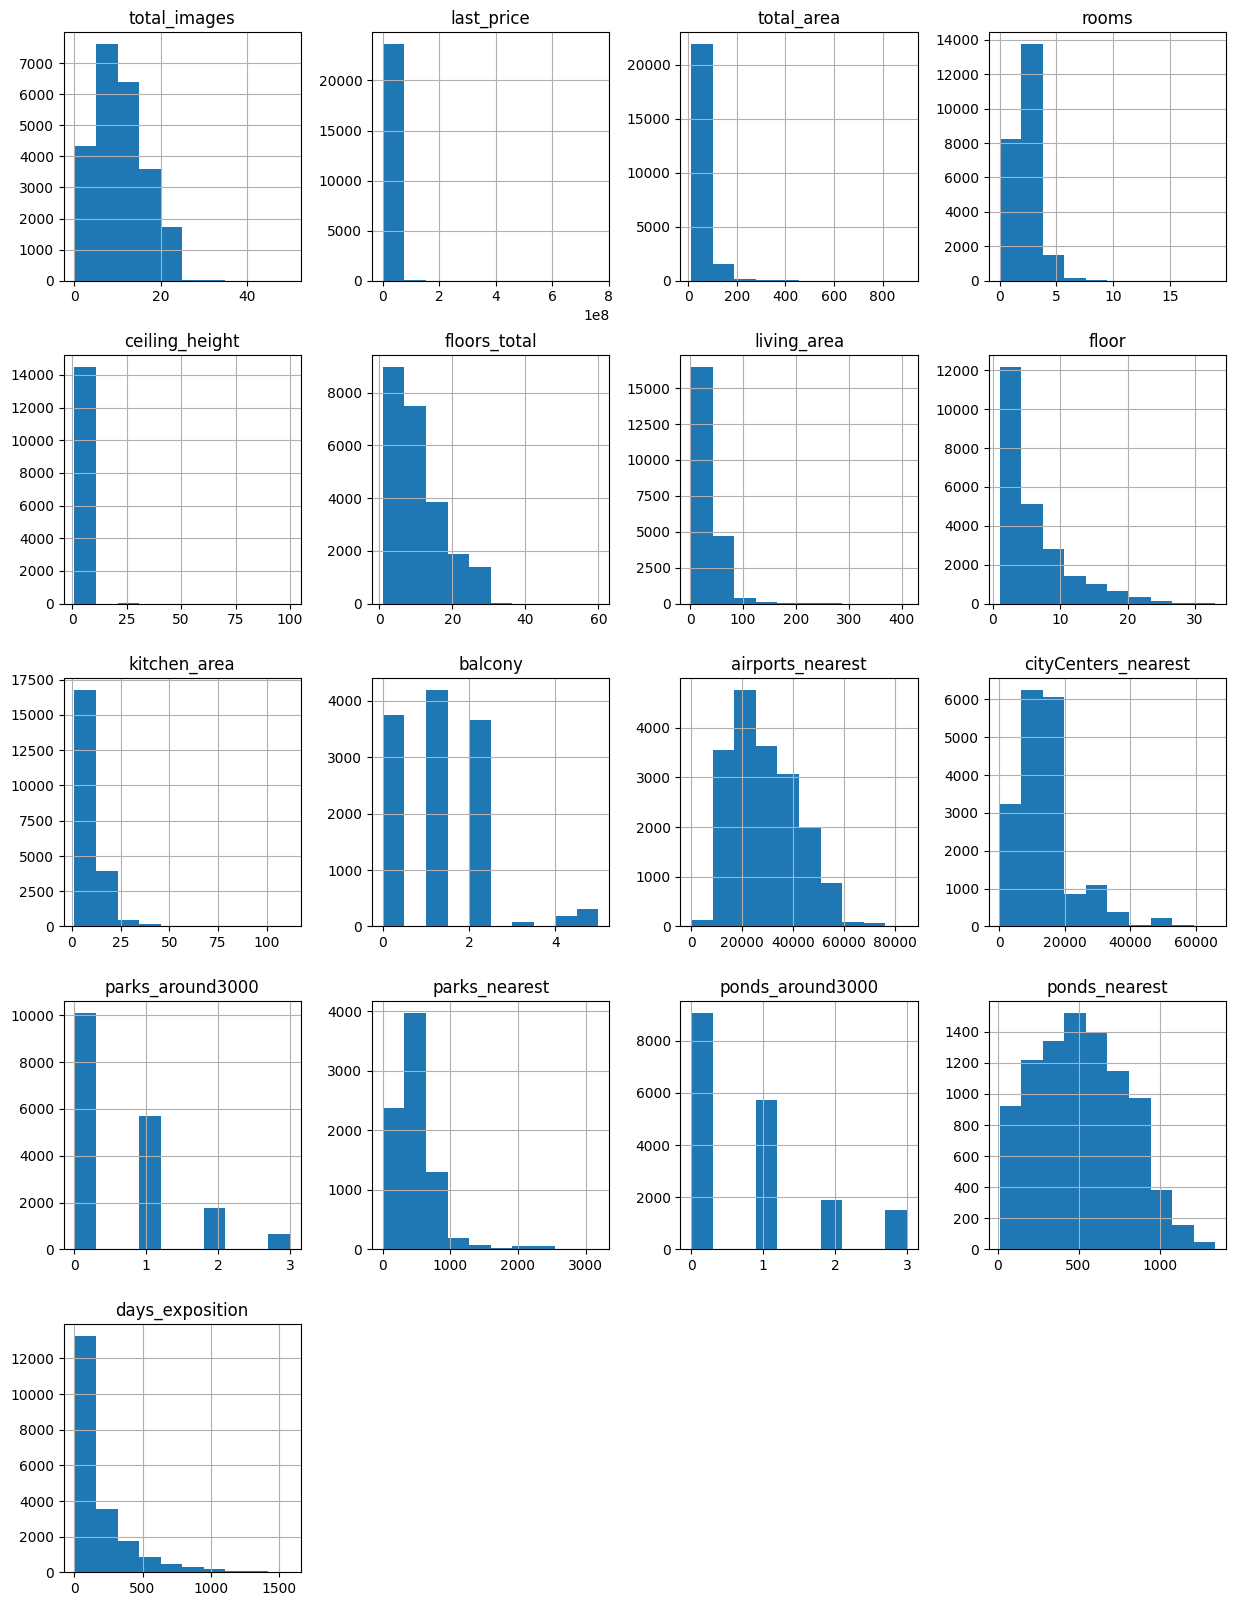

In [167]:
data.hist(figsize = (15, 20));

После вывода общей информации о датасете, а также построения гистограмм по столбцам, можно выявить следующее:
- автоматическая система, которая подсчитывала расстояния до разных географических объектов, сгенерировала много пропусков в соответствующих столбцах(`'parks_nearest'`, `'parks_around3000'`, `'airports_nearest'`, `'city_centers_nearest'` и др. )
- в столбце, в котором записаны высоты потолков, значительное количество пропусков (`'ceiling_height'`)
- присутствуют пропуски в столбцах, отражающих информацию о площадях квартир (`'living_area'`, `'kitchen_area'`)

### Предобработка данных

**1. Поиск и анализ пропусков**

In [168]:
data.isna().sum()

,0
total_images,0
last_price,0
total_area,0
first_day_exposition,0
rooms,0
ceiling_height,9195
floors_total,86
living_area,1903
floor,0
is_apartment,20924


**Наблюдения и предположения:**
-   Отсутсвие значений в столбце `'balcony'` может свидетельствовать об отсутствии балкона в квартире
-   Отсутствие значений в столбцах `'parks_nearest'`, `'ponds_nearest'` может быть вызвано отсутствием парков и водоёмов вблизи кваритры
-   Количество пропусков в столбцах `'parks_nearest'`,`'ponds_nearest'` имеет одинаковый порядок (приблизительно по 15000 в каждом), что может быть обусловлено ошибкой системы географических данных. Также, если в столбцах `'parks_around3000'`, `'ponds_around3000'` есть хотя бы одно единица, то можно утверждать, что ближайший парк или пруд находится в 3000 метрах.
-   Большое количество пропусков наблюдается в столбце `'ceiling_height'` (около 9000). Вероятно пропущенные значения нужно заменить на медианные значения высот потолков для подобного рода квартир
-   В столбцах `'cityCenters_nearest'`, `'airports_nearest'`, `'ponds_around3000'`, `'parks_around3000'` практически одинаковое количество пропусков (около 5500), что также очень похоже на сбой системы, которая рассчитывала географические данные по этим квартирам
-   Отсутсвие значений в столбце `'is_apartment'` может указывать на то, что квартира не является апартаментом. С другой стороны, если все пропуски заменить на False, то процент апартаментов окажется очень мал (~0.2%), чего быть не может
-   Переименуем столбец `'cityCenters_nearest'` на `'city_centers_nearest'`
-   О возникновении пропусков в остальных столбцах пока что нельзя сказать чего - то конкретного, нужны дополнительные исследования
  

In [169]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')
        );
        plt.xlabel('Количество пропусков, %', fontsize = 16)
        plt.ylabel('Названия столбцов', fontsize = 16)
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

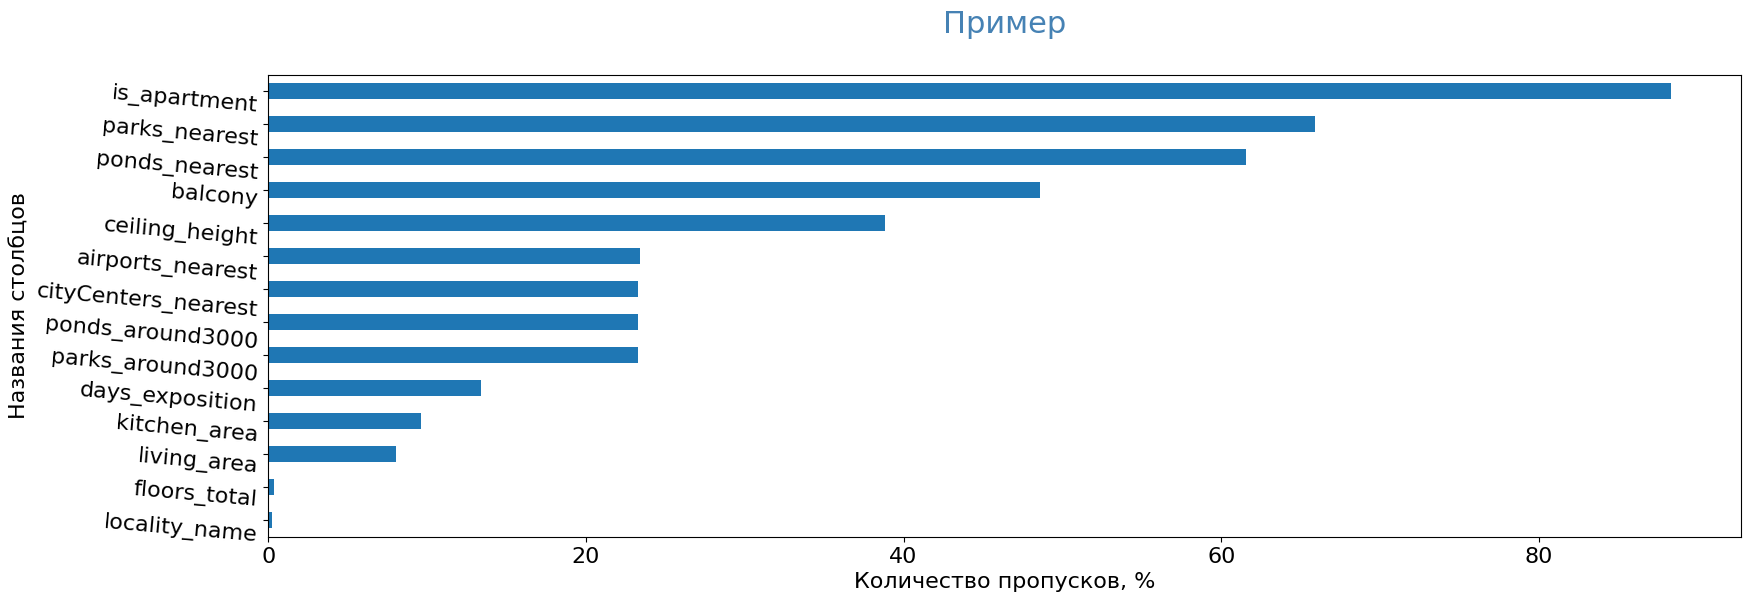

In [170]:
pass_value_barh(data)

In [171]:
data.loc[(data['parks_around3000'] >= 1) & (data['parks_nearest'].isna())]


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [172]:
data.loc[(data['ponds_around3000'] >= 1) & (data['ponds_nearest'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


-       Гипотеза о том, что если хотя бы один парк или пруд находится в радиусе
       3 км, то пропуск в соответствующем столбце можно заменить на 3000 м не
       реализуема, так как выборка по этим географическим объектам дала 0 строк

In [173]:
data[['balcony', 'parks_around3000', 'ponds_around3000']] = (
                            data[['balcony', 'parks_around3000', 'ponds_around3000']]
                            .fillna(value = 0)
)
data.isna().sum()

,0
total_images,0
last_price,0
total_area,0
first_day_exposition,0
rooms,0
ceiling_height,9195
floors_total,86
living_area,1903
floor,0
is_apartment,20924


In [174]:
data['is_apartment'] = data['is_apartment'].fillna(value = False) #замена пропусков в 'is_apartment' на False
data['is_apartment'].isna().sum()

/tmp/ipython-input-312879878.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['is_apartment'] = data['is_apartment'].fillna(value = False) #замена пропусков в 'is_apartment' на False


np.int64(0)

In [175]:
data[data['locality_name'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.70,2016-04-15T00:00:00,3,3.55,5.0,50.80,2,False,...,8.80,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.00,2017-05-30T00:00:00,3,NaN,4.0,42.60,2,False,...,18.60,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,34.0
2603,20,3351765.0,42.70,2015-09-20T00:00:00,1,NaN,24.0,15.60,3,False,...,10.70,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.40,2015-10-11T00:00:00,2,NaN,24.0,33.10,21,False,...,8.20,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.50,2016-05-28T00:00:00,2,NaN,5.0,30.80,5,False,...,6.50,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
4151,17,17600000.0,89.50,2014-12-09T00:00:00,2,3.00,8.0,39.62,7,False,...,13.38,0.0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0
4189,7,9200000.0,80.00,2015-12-10T00:00:00,3,4.00,4.0,52.30,3,False,...,10.40,0.0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
4670,1,5500000.0,83.00,2015-08-14T00:00:00,3,NaN,7.0,NaN,6,False,...,NaN,0.0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
5343,19,13540000.0,85.50,2016-01-20T00:00:00,3,NaN,7.0,59.10,5,False,...,8.30,4.0,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0
5707,7,3700000.0,30.00,2016-04-29T00:00:00,1,NaN,24.0,20.00,23,False,...,NaN,0.0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0


- Строки с пропущенными значениями в столбце `'locality_name'` необходимо удалить из выборки, потому как название места не получится восстановить, несмотря на расстояние до центра и прочие факторы. Кроме того, в этих строках присутствуют пропуски и в других столбцах, что делает проблемным их использование в исследовании.

In [176]:
data = data.loc[~data['locality_name'].isna()]

In [177]:
data = data.rename(columns ={'cityCenters_nearest': 'city_centers_nearest'})
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [178]:
data.isna().sum()

,0
total_images,0
last_price,0
total_area,0
first_day_exposition,0
rooms,0
ceiling_height,9160
floors_total,85
living_area,1898
floor,0
is_apartment,0


**2. Преобразование типов данных столбцов**

- Рассмотрим результат метода info(), который был испольльзован ранее, и обнаружим, что в нескольких столбцах значения, которые должны быть целыми числами, указаны в вещественном типе данных. К этим стобцам относятся `'last_price'`, `'floors_total'`, `'floor'`, `'balcony'`, `'airports_nearest'`, `'city_centers_nearest'`, `'parks_around3000'`, `'ponds_around3000'`, `'parks_nearest'`, `'ponds_nearest'`, `'days_exposition'`.
- Число балконов, этажей, количество парков, водоёмов, дней являются целыми числами, поэтому нецелесообразно оставлять их в вещественном типе данных.
- Расстояния до географических объектов указаны в метрах. Целое число в метрах уже даёт понимание о расположении объекта в полной мере и десятые доли метров не играют роли, тем более у этих значений дробная часть равна нулю, что и приводит к мысле о замене типа данных. Для остальных значений логика размышлений аналогична.

In [179]:
data = data.astype(
            {
                'last_price' : 'int64',
                'floors_total': 'int64',
                'floor': 'int64',
                'balcony': 'int64',
                'airports_nearest': 'int64',
                'city_centers_nearest': 'int64',
                'parks_around3000': 'int64',
                'ponds_around3000': 'int64',
                'parks_nearest': 'int64',
                'ponds_nearest': 'int64',
                'days_exposition': 'int64'
}, errors = 'ignore')

data.info()




<class 'pandas.core.frame.DataFrame'>
Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  int64  
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        14490 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21752 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          21381 non-null  float64
 13  balcony               23650 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest      18

- Часть типов данных столбцов удалось изменить. Но данные, связанные с расстояниями, не изменились на целочисленный тип. Выглядит странным тот факт, что тип данных столбцов `'floors_total'`, `'days_exposition'` также не изменился, хотя для них целочисленный тип данных наиболее логичен. Причиной этому большое количество пропусков.

**3. Поиск и устранение дубликатов**

In [180]:
data['locality_name'] = (
        data['locality_name']
        .str
        .replace('поселок', 'посёлок')
        .replace([
                'посёлок городского типа',
                'посёлок станции',
                'посёлок при железнодорожной станции',
                'городской посёлок',
                'коттеджный посёлок'
                 ], 'посёлок', regex=True)
                        )
data.duplicated().sum()



np.int64(0)

In [181]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

In [182]:
data['locality_name'].nunique()

318

-     Все основные дубликаты заменены

In [183]:
data[data['locality_name'].str.contains('Кудрово')]['locality_name'].unique()

array(['деревня Кудрово', 'Кудрово'], dtype=object)

In [184]:
data[data['locality_name'].str.contains('Кудрово')].isna().sum()

,0
total_images,0
last_price,0
total_area,0
first_day_exposition,0
rooms,0
ceiling_height,277
floors_total,2
living_area,48
floor,0
is_apartment,0


- Среди населённых пунктов встретились схожие названия "Кудрово" и "деревня Кудрово". С одной стороны их названия свидетельствуют о том, что это один населённый пункт, с другой стороны расстояние до любых географических объектов не определены, и нельзя сказать в одном месте они находятся или в разных. Но пропуски в одинаковых столбцах указывают на то, что это вероятно один населённый пункт, и природа возникновения пропусков одинакова. Объединим данные нас.пункты.

In [185]:
data['locality_name'] = data['locality_name'].replace('деревня Кудрово', 'Кудрово')

In [186]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

In [187]:
data.isna().sum()

,0
total_images,0
last_price,0
total_area,0
first_day_exposition,0
rooms,0
ceiling_height,9160
floors_total,85
living_area,1898
floor,0
is_apartment,0


In [188]:
#для студий заполним столбец 'kitchen_area' 0
data.loc[(data['kitchen_area'].isna())&(data['studio']), 'kitchen_area'] = 0

In [189]:
data['floors_total'].isna().sum()

np.int64(85)

In [190]:
#удалим пропуски в столбце с количеством этажей в доме
data.dropna(subset = ['floors_total'], inplace = True)


In [191]:
data['floors_total'].isna().sum()

np.int64(0)

In [192]:
#присвоим категорию квартирам по площади
def categorize_flat(square):
    return (square // 50)
data['square_category'] = data['total_area'].apply(categorize_flat).astype('int')

rooms: 0


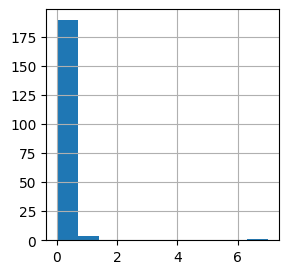

rooms: 1


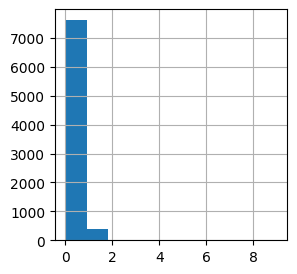

rooms: 2


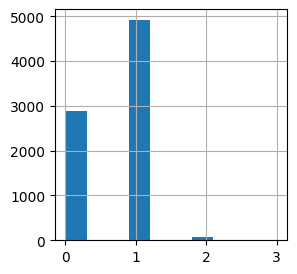

rooms: 3


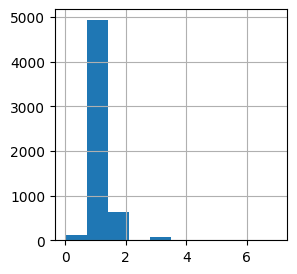

rooms: 4


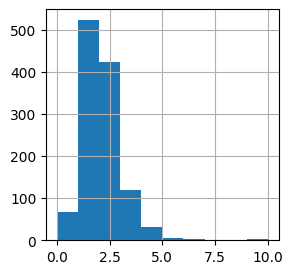

rooms: 5


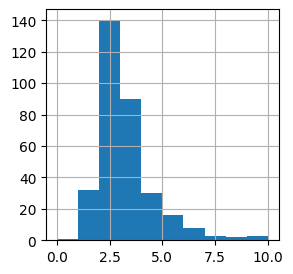

rooms: 6


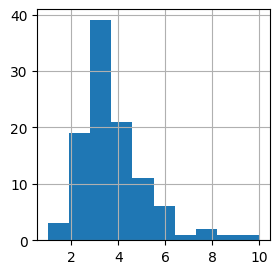

rooms: 7


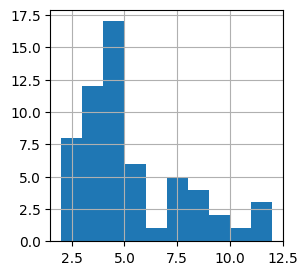

rooms: 8


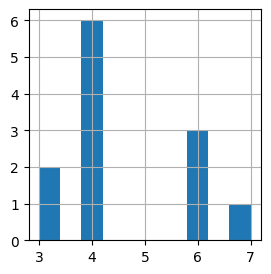

rooms: 9


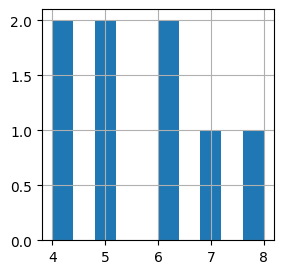

rooms: 10


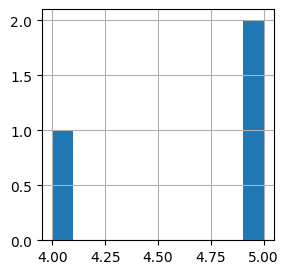

rooms: 11


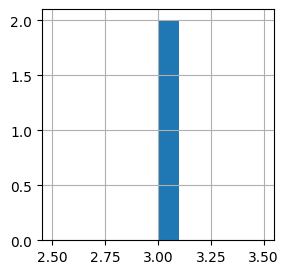

rooms: 12


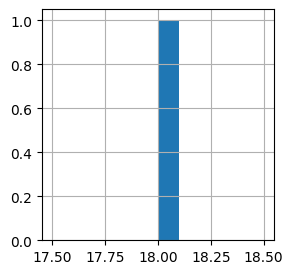

rooms: 14


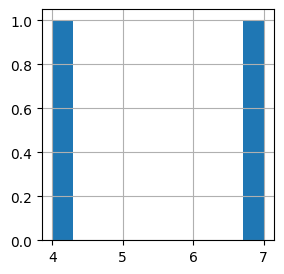

rooms: 15


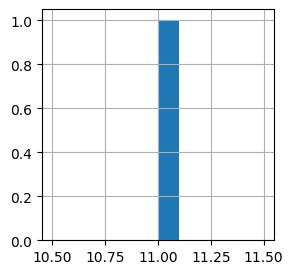

rooms: 16


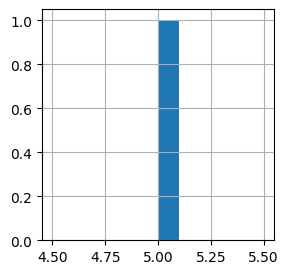

rooms: 19


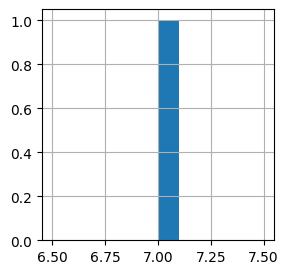

In [193]:
for t in data['rooms'].sort_values().unique():
    print(f"rooms: {t}")
    data.loc[data['rooms'] == t]['square_category'].hist(bins = 10, figsize = (3, 3))
    plt.show()

In [194]:
data['living_area'].describe()

,living_area
count,21700.000000
mean,34.454822
std,22.045359
min,2.000000
25%,18.600000
50%,30.000000
75%,42.300000
max,409.700000


In [195]:
data['living_area'].describe()

,living_area
count,21700.000000
mean,34.454822
std,22.045359
min,2.000000
25%,18.600000
50%,30.000000
75%,42.300000
max,409.700000


In [196]:
data['kitchen_area'].describe()

,kitchen_area
count,21489.000000
mean,10.489241
std,5.944202
min,0.000000
25%,7.000000
50%,9.000000
75%,12.000000
max,112.000000


rooms: 0


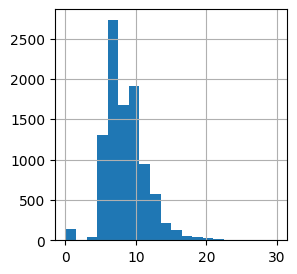

rooms: 1


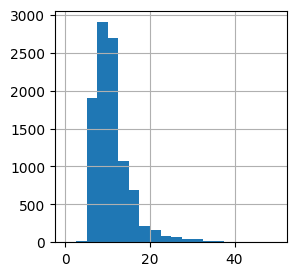

rooms: 2


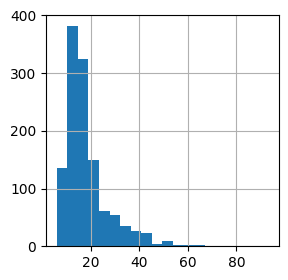

rooms: 3


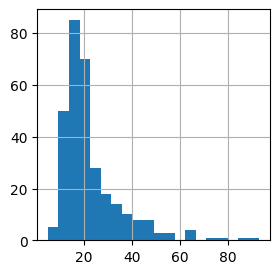

rooms: 4


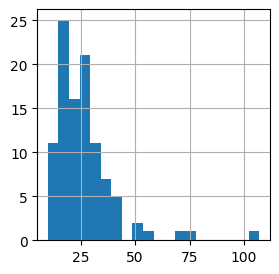

rooms: 5


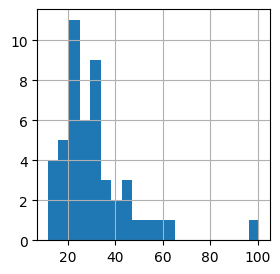

rooms: 6


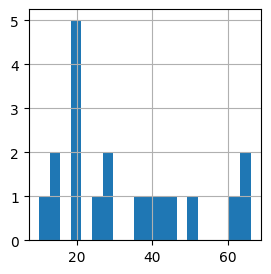

rooms: 7


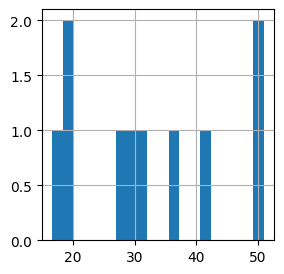

rooms: 8


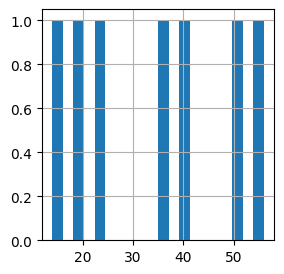

rooms: 9


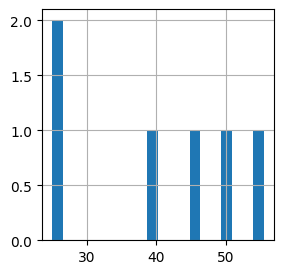

rooms: 10


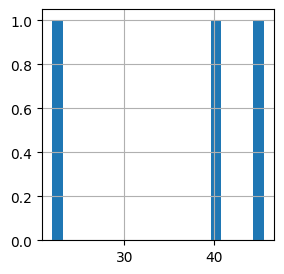

rooms: 11


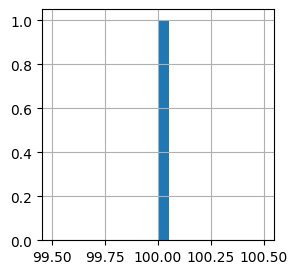

rooms: 12


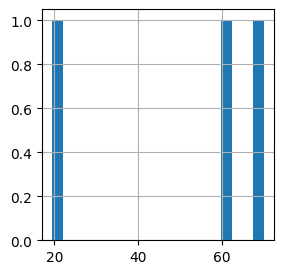

rooms: 18


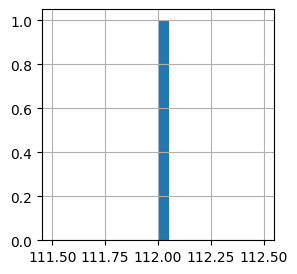

In [197]:
for t in data['square_category'].sort_values().unique():
    print(f"rooms: {t}")
    data.loc[data['square_category'] == t]['kitchen_area'].hist(bins = 20, figsize = (3, 3))
    plt.show()

In [198]:
data.query('total_area*0.9 <= (living_area + kitchen_area)')[['total_area', 'living_area', 'kitchen_area']]

,total_area,living_area,kitchen_area
41,74.0,59.0,12.0
171,49.0,38.0,10.0
184,30.2,26.1,6.2
220,37.0,28.0,9.0
319,59.7,47.4,6.4
...,...,...,...
23216,114.0,90.2,16.0
23297,48.2,42.2,6.0
23328,54.0,40.0,10.0
23521,65.0,44.0,15.3


In [199]:
data.query('(total_area*0.9 <= (living_area + kitchen_area))&(studio)')[['total_area', 'living_area', 'kitchen_area']]

,total_area,living_area,kitchen_area
440,27.11,24.75,0.0
8683,32.50,29.90,0.0
21227,71.00,68.00,0.0


In [200]:
data['living_area'].describe()

,living_area
count,21700.000000
mean,34.454822
std,22.045359
min,2.000000
25%,18.600000
50%,30.000000
75%,42.300000
max,409.700000


In [201]:
data.query('studio')['total_images'].count()

np.int64(146)

In [202]:
data['kitchen_area'].describe()

,kitchen_area
count,21489.000000
mean,10.489241
std,5.944202
min,0.000000
25%,7.000000
50%,9.000000
75%,12.000000
max,112.000000


rooms: 0


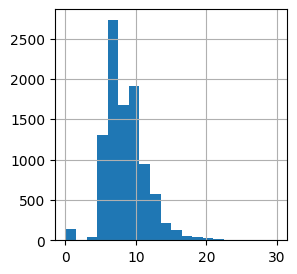

rooms: 1


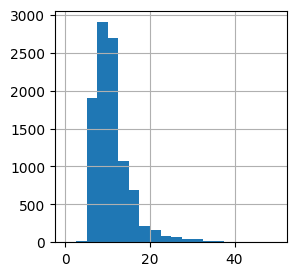

rooms: 2


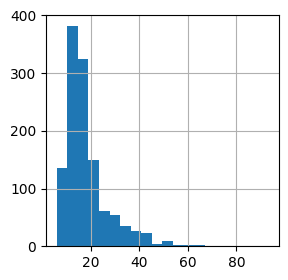

rooms: 3


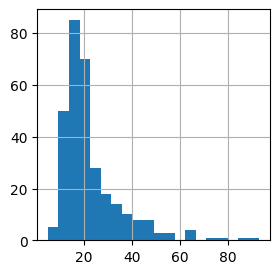

rooms: 4


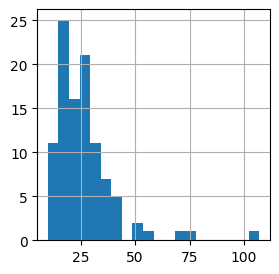

rooms: 5


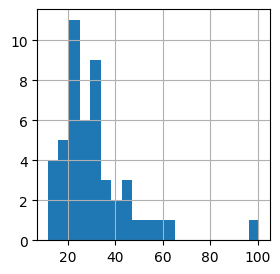

rooms: 6


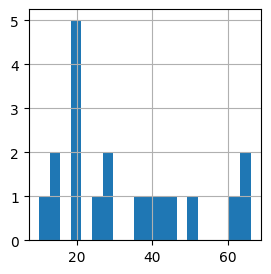

rooms: 7


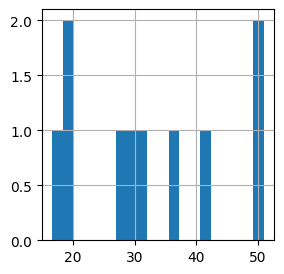

rooms: 8


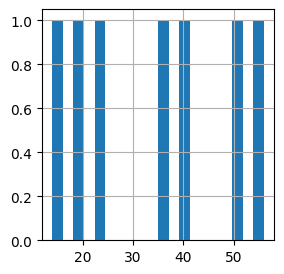

rooms: 9


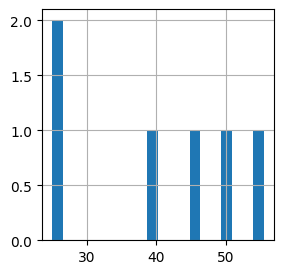

rooms: 10


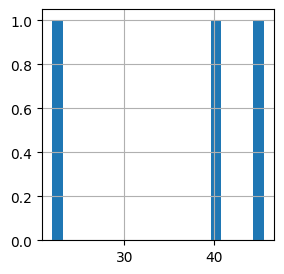

rooms: 11


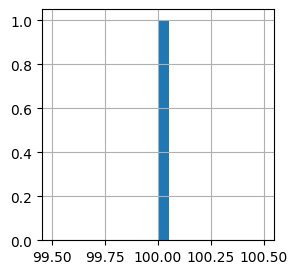

rooms: 12


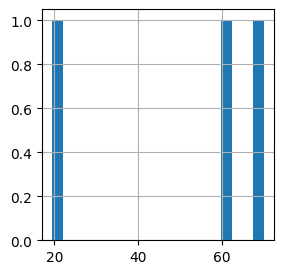

rooms: 18


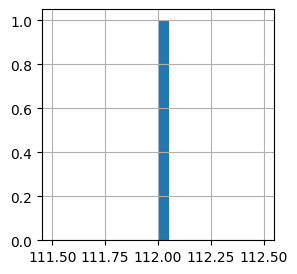

In [203]:
for t in data['square_category'].sort_values().unique():
    print(f"rooms: {t}")
    data.loc[data['square_category'] == t]['kitchen_area'].hist(bins = 20, figsize = (3, 3))
    plt.show()

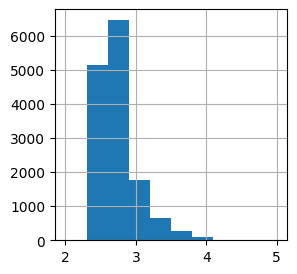

In [204]:
#заполним пропуски в столбце ceiling_height
#уберём сильно выбивающиеся значения
data.loc[(data['ceiling_height'] >= 22) & (~data['ceiling_height'].isna()), 'ceiling_height'] /= 10
data['ceiling_height'].hist(bins = 10,range = (2, 5), figsize = (3,3));

In [205]:
#посмотрим, с какими столбцами коррелирует высота комнаты
#присвоим категории квартирам по принципу удаления от центра с шагом 5 км
def categorize_distance_to_city_center(distance):
    if not (pd.isna(distance)):
        return(int(distance / 5000))

data['category_distance_to_city_center'] = data['city_centers_nearest'].apply(categorize_distance_to_city_center)
data.pivot_table(index = 'category_distance_to_city_center', values = ['city_centers_nearest', 'ceiling_height'], aggfunc = ['median', 'count'])

median                       \
                                 ceiling_height city_centers_nearest   
category_distance_to_city_center                                       
0.0                                       3.100               3795.0   
1.0                                       2.800               7643.0   
2.0                                       2.600              12665.0   
3.0                                       2.600              16361.0   
4.0                                       2.650              21997.0   
5.0                                       2.600              27842.5   
6.0                                       2.580              31914.0   
7.0                                       2.700              35511.0   
8.0                                       2.750              40738.0   
9.0                                       2.500              48668.0   
10.0                                      2.550              51533.0   
11.0                                      2.500              59052.0   
12.0                                      2.525              62454.0   
13.0                                      2.525              65858.0   

                                          count                       
                                 ceiling_height city_centers_nearest  
category_distance_to_city_center                                      
0.0                                        1384                 2060  
1.0                                        1938                 3000  
2.0                                        4376                 6725  
3.0                                        2234                 3667  
4.0                                         376                  696  
5.0                                         357                  584  
6.0                                         582                  908  
7.0                                          86                  125  
8.0                                          17                   27  
9.0                                          55                   86  
10.0                                        126                  174  
11.0                                          1                    3  
12.0                                          4                    5  
13.0                                          4                    4

- Заметим, что квартиры, находящиеся ближе к центру имеют более высокие потолки по медианному значению. Поэтому заменим все пропуски в столбце `'ceiling_height'` медианными значениями соответствующей категории

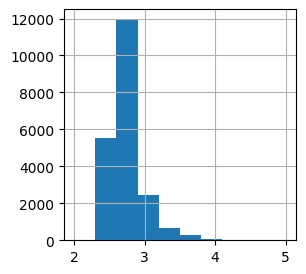

In [206]:
for i in data['category_distance_to_city_center'].unique():
    data.loc[(data['category_distance_to_city_center'] == i) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['category_distance_to_city_center'] == i), 'ceiling_height'].median()
data['ceiling_height'].hist(bins = 10,range = (2, 5), figsize = (3,3));

In [207]:
data.pivot_table(index = 'category_distance_to_city_center', values = ['city_centers_nearest', 'ceiling_height'], aggfunc = ['median', 'count'])

median                       \
                                 ceiling_height city_centers_nearest   
category_distance_to_city_center                                       
0.0                                       3.100               3795.0   
1.0                                       2.800               7643.0   
2.0                                       2.600              12665.0   
3.0                                       2.600              16361.0   
4.0                                       2.650              21997.0   
5.0                                       2.600              27842.5   
6.0                                       2.580              31914.0   
7.0                                       2.700              35511.0   
8.0                                       2.750              40738.0   
9.0                                       2.500              48668.0   
10.0                                      2.550              51533.0   
11.0                                      2.500              59052.0   
12.0                                      2.525              62454.0   
13.0                                      2.525              65858.0   

                                          count                       
                                 ceiling_height city_centers_nearest  
category_distance_to_city_center                                      
0.0                                        2060                 2060  
1.0                                        3000                 3000  
2.0                                        6725                 6725  
3.0                                        3667                 3667  
4.0                                         696                  696  
5.0                                         584                  584  
6.0                                         908                  908  
7.0                                         125                  125  
8.0                                          27                   27  
9.0                                          86                   86  
10.0                                        174                  174  
11.0                                          3                    3  
12.0                                          5                    5  
13.0                                          4                    4

In [208]:
data.isna().sum()

,0
total_images,0
last_price,0
total_area,0
first_day_exposition,0
rooms,0
ceiling_height,2560
floors_total,0
living_area,1865
floor,0
is_apartment,0


**Вывод:**
- Преобразованы типы данных столбцов, где это возможно. В каких - то столбцах типы данных не изменились ввиду большого количества пропусков
- Были устранены дубликаты, обусловленные разными классификациями нас.пунктов и особенностями написания слов
- Были заполнены пропуски в столбцах `'is_apartment'`, `'studio'`
- Пропуски в столбцах, связанных с географическими данными, устранять бессмысленно
- Пропуски в столбце `'ceiling_height'` заполнены на основании удалённости жилья от центра города
- Также не заполнялись пропуски в столбцах связанных с площадью, так как данных для исследования достаточно и синтетические в этом столбце могут привести к искажениям результатов

### Добавление новых столбцов в таблицу

**1. Добавление столбца со стоимостью одного квадратного метра**

In [209]:
data['one_quadrat_metre_area_price'] = (data['last_price'] / data['total_area']).astype('int')

**2.Добавление столбцов с днём недели, месяцем, годом публикации**

In [210]:
import datetime
weekdays = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
data['date_format'] = pd.to_datetime(data['first_day_exposition'].str[:(-9)], format = '%Y-%m-%d')
data['month_of_exposition'] = pd.DatetimeIndex(data['date_format']).month
data['year_of_exposition'] = pd.DatetimeIndex(data['date_format']).year
def get_week_day(first_day_exposition):
    return(weekdays[first_day_exposition.weekday()])
data['weekday_of_first_day_exposition'] = data['date_format'].apply(get_week_day)
data.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,square_category,category_distance_to_city_center,one_quadrat_metre_area_price,date_format,month_of_exposition,year_of_exposition,weekday_of_first_day_exposition
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,2,755.0,NaN,2,3.0,120370,2019-03-07,3,2019,Четверг
1,7,3350000,40.4,2018-12-04T00:00:00,1,2.60,11.0,18.6,1,False,...,0,NaN,81.0,0,3.0,82920,2018-12-04,12,2018,Вторник
2,10,5196000,56.0,2015-08-20T00:00:00,2,2.60,5.0,34.3,4,False,...,2,574.0,558.0,1,2.0,92785,2015-08-20,8,2015,Четверг
3,0,64900000,159.0,2015-07-24T00:00:00,3,2.80,14.0,NaN,9,False,...,3,234.0,424.0,3,1.0,408176,2015-07-24,7,2015,Пятница
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,1,48.0,121.0,2,1.0,100000,2018-06-19,6,2018,Вторник


**3. Определение типа этажа**

In [211]:
data['floors_total'] = data['floors_total'].astype('int')
def floor_define(row):
    if (row['floor'] > 0) and (row['floor'] != np.nan):
        if row['floor'] == 1:
            return ('первый')
        elif row['floor'] == row['floors_total']:
            return ('последний')
        else:
            return ('другой')
    else:
        return (np.nan)

data['floor_type'] = data.apply(floor_define, axis = 1)
data['floor_type'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

**4. Перевод расстояния до центра в километры**

In [212]:
def translate_from_metres_to_kilometres(distance):
    try:
        return (int(round((distance / 1000), 0)))
    except:
        return('NaN')


data['city_centers_distance'] = data['city_centers_nearest'].apply(translate_from_metres_to_kilometres)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,square_category,category_distance_to_city_center,one_quadrat_metre_area_price,date_format,month_of_exposition,year_of_exposition,weekday_of_first_day_exposition,floor_type,city_centers_distance
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,...,NaN,2,3.0,120370,2019-03-07,3,2019,Четверг,другой,16
1,7,3350000,40.4,2018-12-04T00:00:00,1,2.60,11,18.6,1,False,...,81.0,0,3.0,82920,2018-12-04,12,2018,Вторник,первый,19
2,10,5196000,56.0,2015-08-20T00:00:00,2,2.60,5,34.3,4,False,...,558.0,1,2.0,92785,2015-08-20,8,2015,Четверг,другой,14
3,0,64900000,159.0,2015-07-24T00:00:00,3,2.80,14,NaN,9,False,...,424.0,3,1.0,408176,2015-07-24,7,2015,Пятница,другой,7
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,...,121.0,2,1.0,100000,2018-06-19,6,2018,Вторник,другой,8


### Исследовательский анализ данных

**1. Анализ данных некоторых столбцов и удаление выбивающихся значений**

- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- тип этажа квартиры (первый, последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего парка

Напишем функцию, которая будет выводить информацию о столбце, а также строить гистограммы и выводить другие важные параметры

*1.Общая площадь*

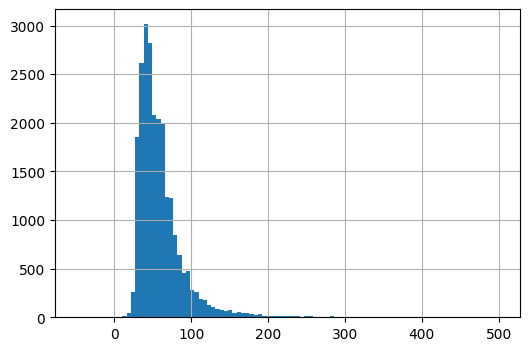

In [213]:
def get_info_column(data_column, bins_col, a, b):
    data_column.hist(bins = bins_col, range=(a, b))
#get_info_column(data['total_area'], 30, 0, 500)
data['total_area'].hist(bins = 100, range = (-50, 500), figsize = (6, 4));

- На гистограмме видно, что часть квартир, составляющая основу датасета, располается в интервале площади от 25 до 250 квадратных метров. Рассмотрим детальнее гистограмму на её концах.

<Axes: >

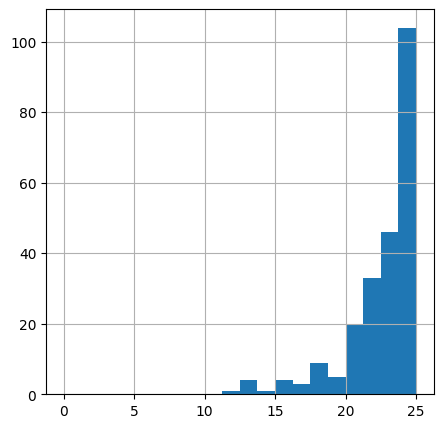

In [214]:
data['total_area'].hist(bins = 20, range = (0, 25), figsize = (5, 5))

- По гистограмме видно, что квартир площадью от 20 до 25 ещё значительное количество, поэтому оставим их в датасете

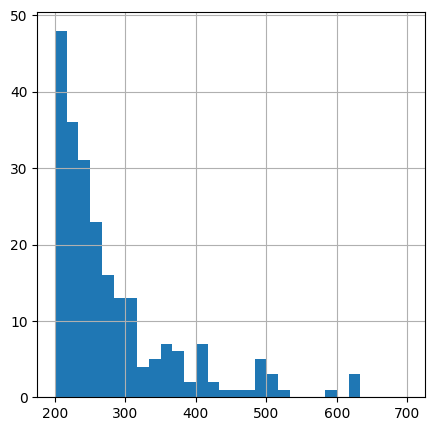

In [215]:
data['total_area'].hist(bins = 30, range = (200, 700), figsize = (5, 5));

- Правую границу интервала оставим без изменений

,total_area
count,23565.000000
mean,60.322824
std,35.657060
min,12.000000
25%,40.000000
50%,52.000000
75%,69.700000
max,900.000000


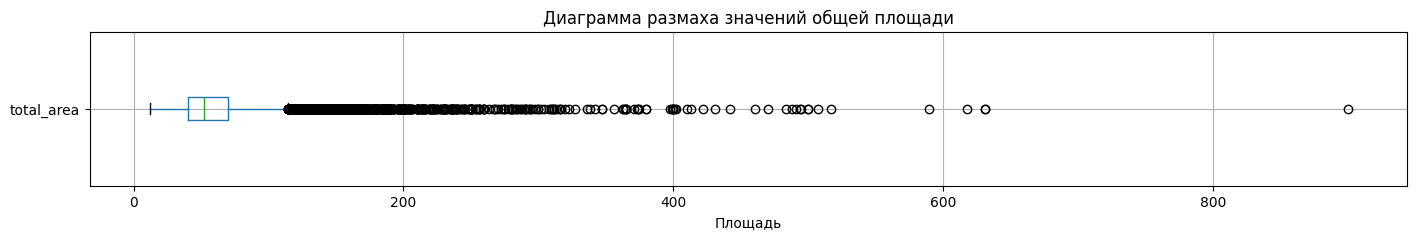

In [216]:
fig, ax = plt.subplots(figsize = (17, 2))
ax = data[['total_area']].boxplot(vert = False, ax = ax)
ax.set_title('Диаграмма размаха значений общей площади')
ax.set_xlabel('Площадь')

data['total_area'].describe()


In [217]:
(
    data[['total_area']].quantile([.0012, .9976])
    .style.format("{:,.2f}")
)

,total_area
0.001200,20.00
0.997600,309.83


- Опираясь на гистограммы и диаграммы размаха, отбросим все данные, которые находятся за пределами интервала (20, 250) квадратных метров.
- Посчитаем процент удалённых данных

In [218]:
print(((data.loc[(data['total_area'] >=20) & (data['total_area'] <=250), 'total_images'].count())/data['total_images'].count()).round(4))
data = data.loc[(data['total_area'] >=20) & (data['total_area'] <=250)]

0.9941


- Было удалено около 0.6 % данных

*2. Жилая площадь*

<Axes: >

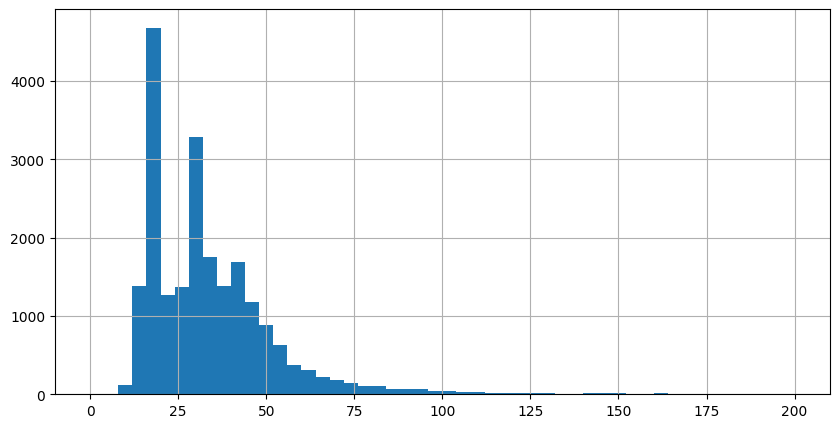

In [219]:
data['living_area'].hist(bins = 50, range = (0, 200), figsize = (10, 5))

- Основа данных располагается в интервале от 13 до 125 квадратных метра. Посмотрим, какое количество данных ближе к краям гистограммы

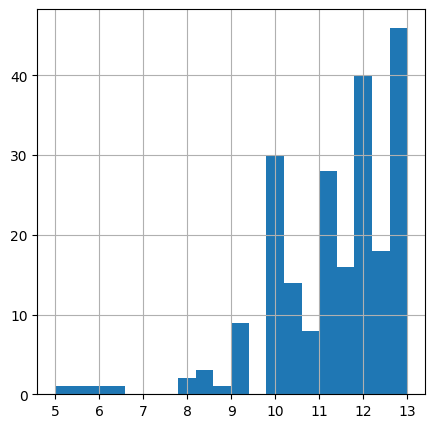

In [220]:
data['living_area'].hist(bins = 20, range = (5, 13), figsize = (5, 5));

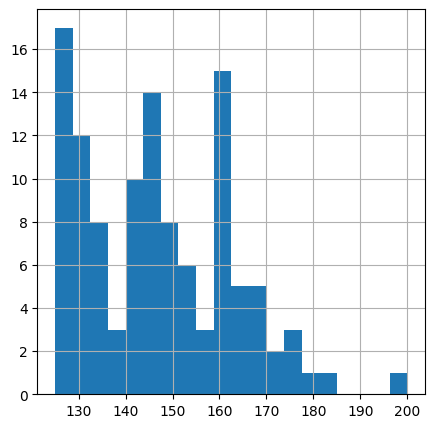

In [221]:
data['living_area'].hist(bins = 20, range = (125, 200), figsize = (5, 5));

- Учитывая рассчитанные ниже квантили и гистограмму, для правой границы установим значение в 160 квадратных метра

- Нужно также учесть тот факт, что у квартир есть ограничение по минимальной жилой площади, и оно составляет примерно 13 квадратных метра. Поэтому оставим в датасете данные с жилой площадью от 13 до 160 квадратных метра.

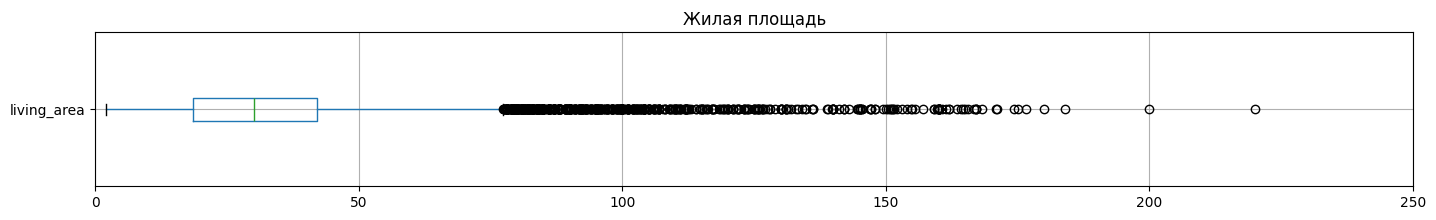

In [222]:
fig, ax = plt.subplots(figsize = (17, 2));
ax = data[['living_area']].boxplot(vert = False, ax = ax);
ax.set_title('Жилая площадь');
ax.set_xlim(0, 250);

In [223]:
(
    data[['living_area']].quantile([.0012, .9988])
    .style.format("{:,.2f}")
)

,living_area
0.001200,10.00
0.998800,160.00


In [224]:
data['living_area'].describe()

,living_area
count,21589.000000
mean,33.780396
std,18.935563
min,2.000000
25%,18.600000
50%,30.000000
75%,42.100000
max,220.000000


In [225]:
shape_before_delete = data['total_images'].count()
data = data.loc[((data['living_area'] >=13) & (data['living_area'] <=160)) | (data['living_area'].isna())]
(data['total_images'].count() / shape_before_delete).round(4)

np.float64(0.9911)

- Было удалено около 0.9 % данных

*3. Площадь кухни*

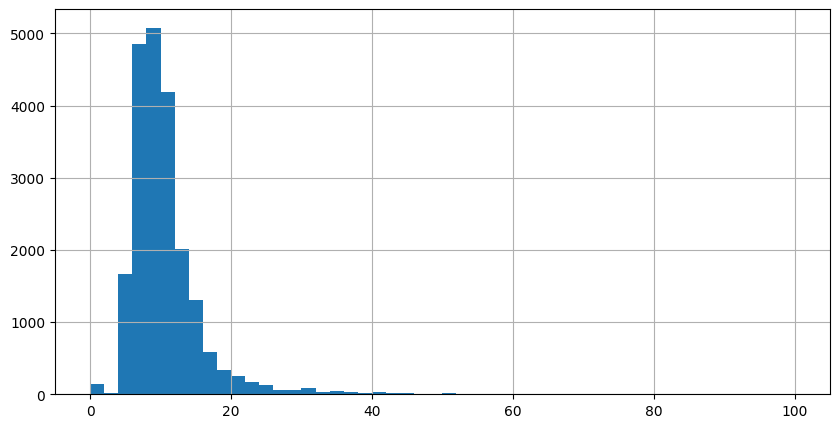

In [226]:
#get_info_column(data['kitchen_area'], 40, 0, 100)
data['kitchen_area'].hist(bins = 50, range = (0, 100), figsize = (10, 5));

In [227]:
(
    data[['kitchen_area']].quantile([.0012, .9988])
    .style.format("{:,.2f}")
)

,kitchen_area
0.001200,0.00
0.998800,53.06


- Рассмотрим правый край гистограммы детальнее, потому как для левого всё очевидно ввиду площади равной 0 у квартир - студий

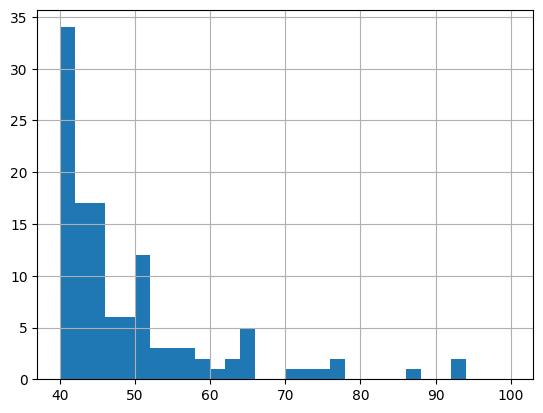

In [228]:
data['kitchen_area'].hist(bins = 30, range = (40, 100));

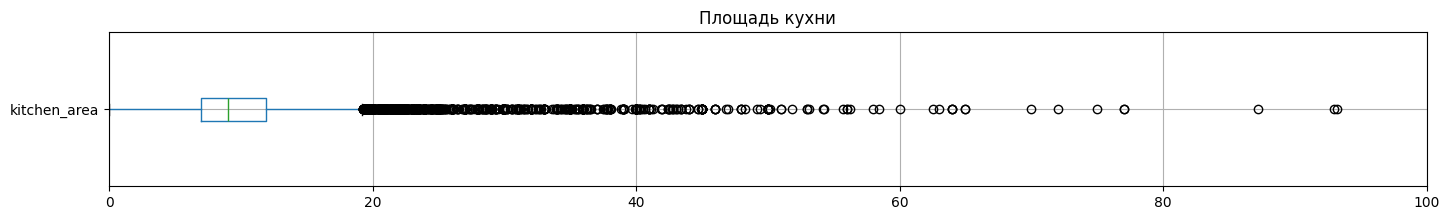

In [229]:
fig, ax = plt.subplots(figsize = (17, 2));
ax = data[['kitchen_area']].boxplot(vert = False, ax = ax);
ax.set_title('Площадь кухни');
ax.set_xlim(0, 100);

- Отбросим из датасета квартиры, площадь кухни которых превышает 45 квадратных метров.

In [230]:
data['kitchen_area'].describe()

,kitchen_area
count,21195.000000
mean,10.346758
std,5.561258
min,0.000000
25%,7.000000
50%,9.000000
75%,11.900000
max,107.000000


In [231]:
shape_before_delete = data['total_images'].count()
data = data.loc[(data['kitchen_area'] <= 45) | (data['kitchen_area'].isna())]
(data['total_images'].count() / shape_before_delete).round(4)

np.float64(0.9978)

- Было удалено 0.2 % данных

In [232]:
#data.info()

*4.Цена объекта*

<Axes: >

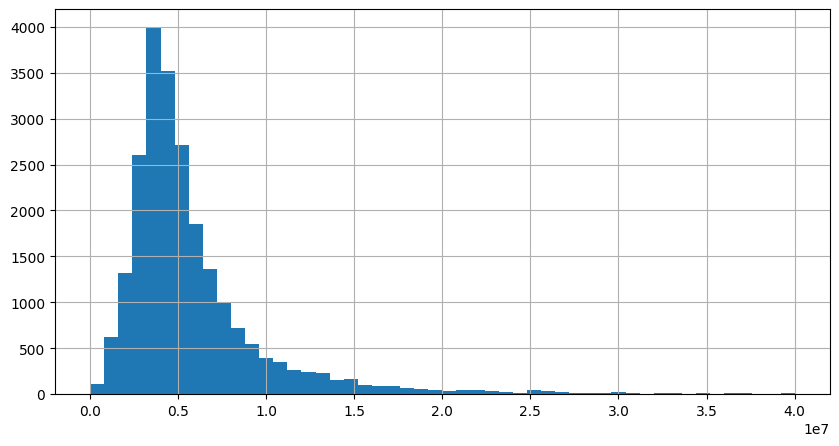

In [233]:
data['last_price'].hist(bins = 50, range = (0, 40000000), figsize = (10, 5))

In [234]:
data['last_price'].describe()

,last_price
count,2.316700e+04
mean,6.101434e+06
std,6.592007e+06
min,1.219000e+04
25%,3.400000e+06
50%,4.600000e+06
75%,6.700000e+06
max,3.300000e+08


In [235]:
(
    data[['last_price']]
        .quantile([.0012, .9988])
        .style.format("{:,.2f}")
)

,last_price
0.001200,"560,000.00"
0.998800,"67,200,800.00"


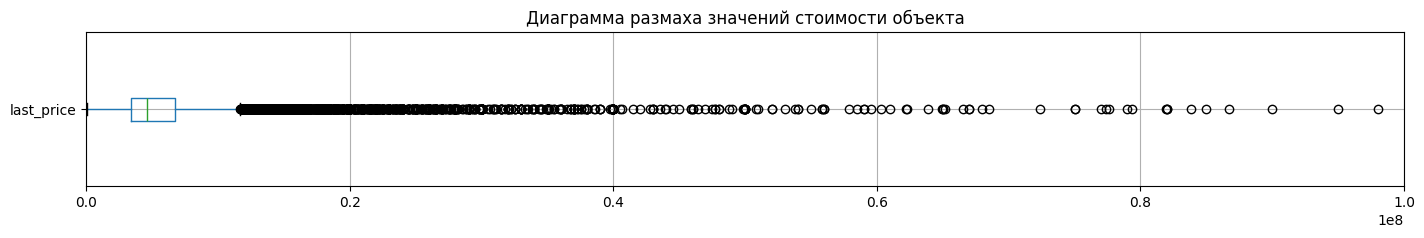

In [236]:
fig, ax = plt.subplots(figsize = (17, 2));
ax = data[['last_price']].boxplot(vert = False, ax = ax);
ax.set_title('Диаграмма размаха значений стоимости объекта');
ax.set_xlim(0, 100000000);

- Рассмотрим детальнее гистограмму для квартир, стоимость которых менее 1 миллиона и более 30 миллионов.

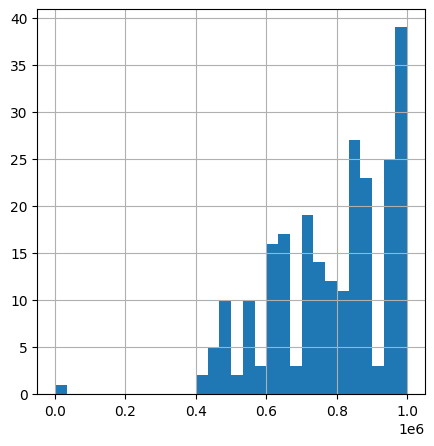

In [237]:
data['last_price'].hist(bins = 30, range = (0, 1000000), figsize = (5, 5));

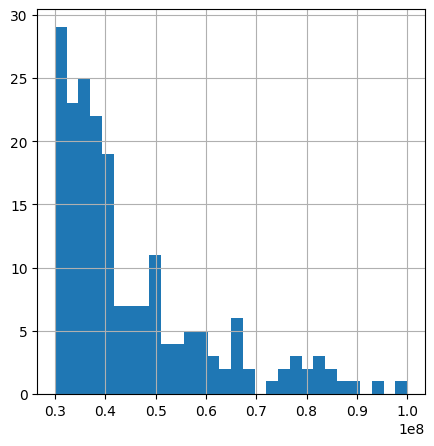

In [238]:
data['last_price'].hist(bins = 30, range = (30000000, 100000000), figsize = (5, 5));

- Отбросим квартиры стоимостью менее 800,000 рублей и более 40,000,000 рублей

In [239]:
shape_before_delete = data['total_images'].count()
data = data.loc[(data['last_price'] <= 40000000) & (data['last_price'] >= 800000)]
(data['total_images'].count() / shape_before_delete).round(4)

np.float64(0.9911)

- Было удалено около 0.9 % данных

*5. Количество комнат*

In [240]:
data['rooms'].sort_values(ascending = True).value_counts()

,count
rooms,
2,7815
1,7759
3,5705
4,1113
5,275
0,181
6,73
7,31
8,5


In [241]:
df_rooms = data.pivot_table(index = 'rooms', values = 'total_images', aggfunc = ['count'])
df_rooms.columns = ['quantity']
df_rooms['part_of_all_quantity_rooms'] = (df_rooms['quantity'] / df_rooms['quantity'].sum()).round(5)
df_rooms

,quantity,part_of_all_quantity_rooms
rooms,,
0,181,0.00788
1,7759,0.33792
2,7815,0.34036
3,5705,0.24846
4,1113,0.04847
5,275,0.01198
6,73,0.00318
7,31,0.00135
8,5,0.00022


- Оставим в выборке квартиры с количеством комнат от 0 до 5, потому как остальные квартиры составляют суммарно менее одного процента от выборки, а именно чуть меньше 0.5 %. Поэтому удалим квартиры с количеством комнат более 5.

In [242]:
df_rooms.loc[df_rooms['part_of_all_quantity_rooms'] < 0.005, 'part_of_all_quantity_rooms'].sum().round(4)

np.float64(0.0049)

In [243]:
shape_before_delete = data['total_images'].count()
data = data.loc[(data['rooms'] >=0) & (data['rooms'] <=5)]
(data['total_images'].count() / shape_before_delete).round(4)

np.float64(0.9951)

*6. Высота потолков*

<Axes: >

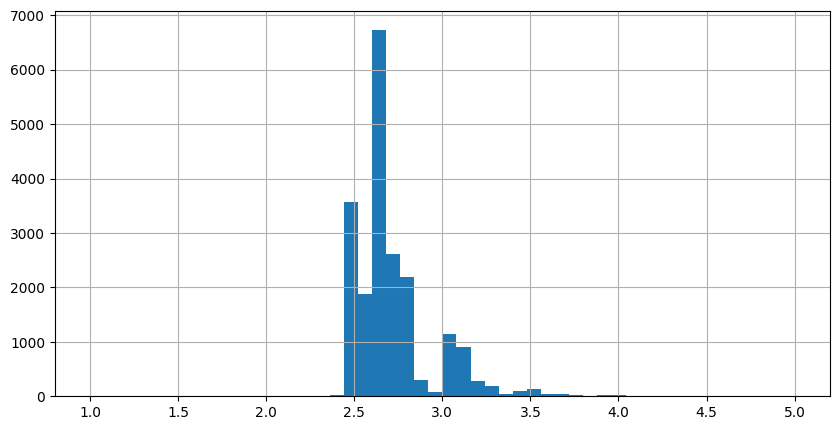

In [244]:
data['ceiling_height'].hist(bins = 50, range = (1, 5), figsize = (10, 5))

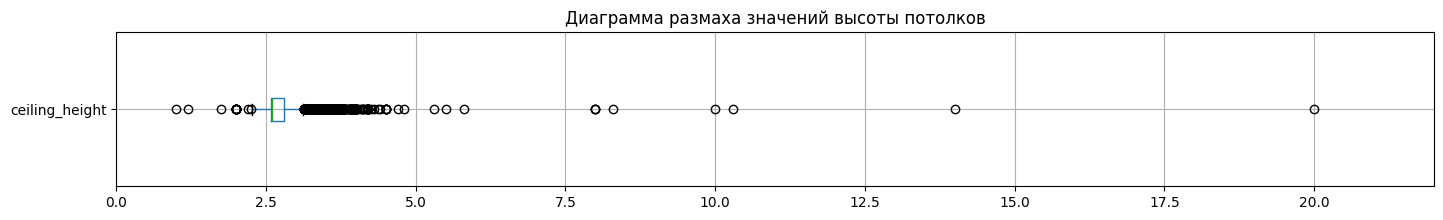

In [245]:
fig, ax = plt.subplots(figsize = (17, 2));
ax = data[['ceiling_height']].boxplot(vert = False, ax = ax);
ax.set_title('Диаграмма размаха значений высоты потолков');
ax.set_xlim(0, 22);

In [246]:
(
data[['ceiling_height']]
    .quantile([.0012, .9988])
    .style.format("{:,.2f}")
)

,ceiling_height
0.001200,2.40
0.998800,4.20


- Высоты потолков, которые превышали 22 метра, были разделены на 10, так как вероятно это ошибка пользователей, которые заполняли объявление. Размах в 0.9976 квантилей даёт понимание о наиболее характерных высотах потолков. Кроме того, 2.4 метра это минимальная высота потолка согласно современным строительным нормам.
- Оставим квартиры с высотой потолков от 2.4 до 4.2 метра.

In [247]:
shape_before_delete = data['total_images'].count()
data = data.loc[((data['ceiling_height'] >= 2.4) & (data['ceiling_height'] <= 4.2)) | (data['ceiling_height'].isna())]
(data['total_images'].count() / shape_before_delete).round(4)

np.float64(0.9981)

- Было удалено около 0.2 % данных

*7. Тип этажа квартиры*

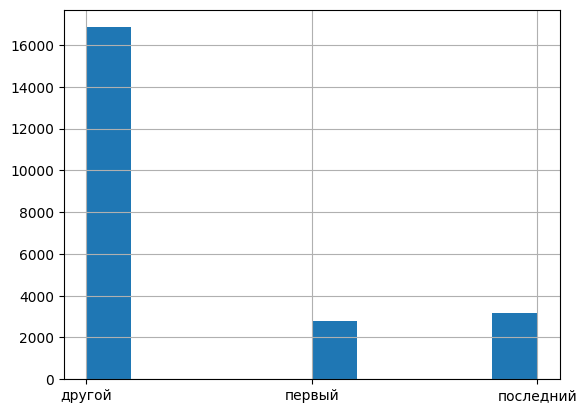

In [248]:
data['floor_type'].hist();

- В этом столбце нет аномалий. Распределение типов этажей похоже на правду. Количество последних и первых этажей примерно одинаковое, а этажей типа 'другой' в 6,5 раза больше двух предыдущих.

*8. Общее количество этажей*

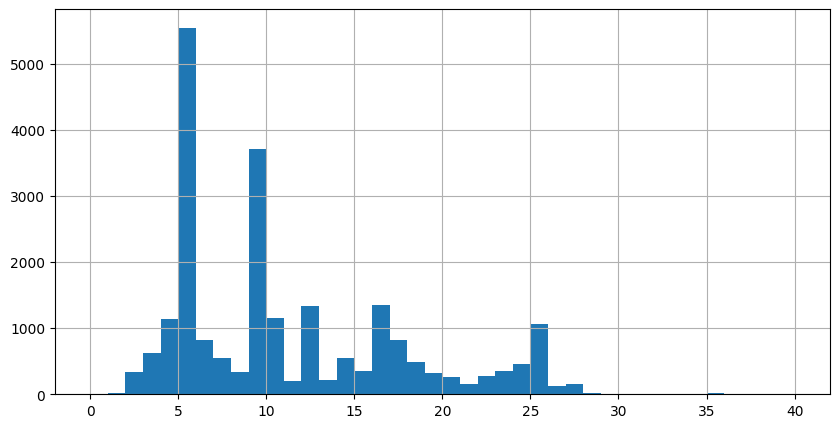

In [249]:
data['floors_total'].hist(bins = 40, range = (0, 40), figsize = (10, 5));

In [250]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22804 entries, 0 to 23697
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   total_images                      22804 non-null  int64         
 1   last_price                        22804 non-null  int64         
 2   total_area                        22804 non-null  float64       
 3   first_day_exposition              22804 non-null  object        
 4   rooms                             22804 non-null  int64         
 5   ceiling_height                    20344 non-null  float64       
 6   floors_total                      22804 non-null  int64         
 7   living_area                       21010 non-null  float64       
 8   floor                             22804 non-null  int64         
 9   is_apartment                      22804 non-null  bool          
 10  studio                            22804 non-null  b

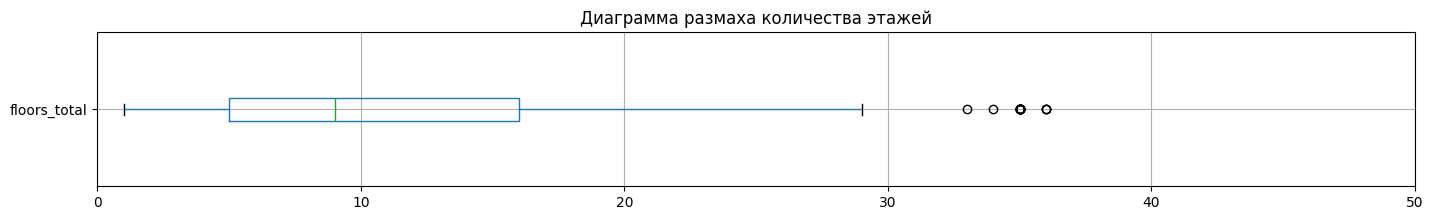

In [251]:
fig, ax = plt.subplots(figsize = (17, 2));
ax = data[['floors_total']].boxplot(vert = False, ax = ax);
ax.set_title('Диаграмма размаха количества этажей');
ax.set_xlim(0, 50);

- Рассмотрим подробнее левый край гистограммы

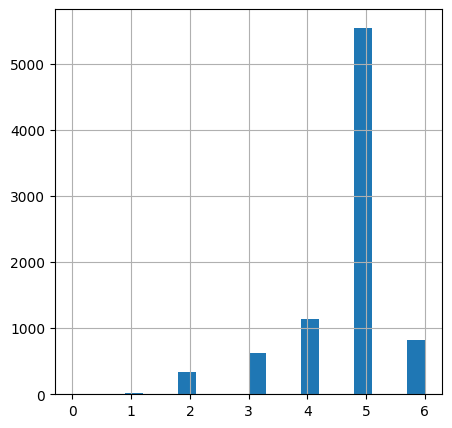

In [252]:
data['floors_total'].hist(bins = 20, range = (0, 6), figsize = (5, 5));

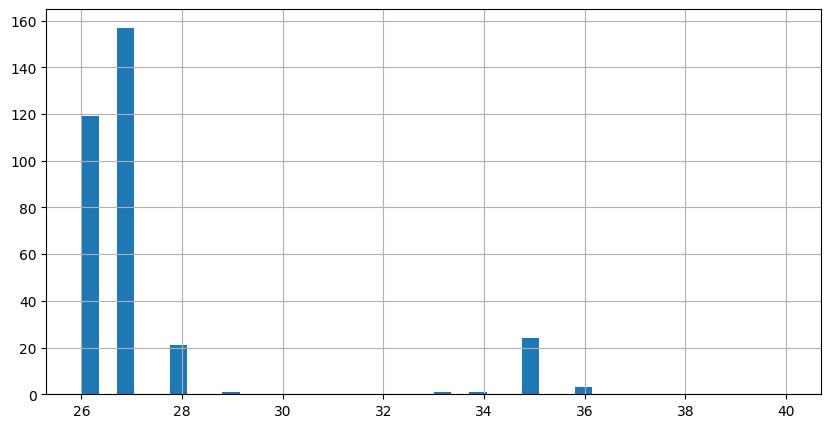

In [253]:
data['floors_total'].hist(bins = 40, range = (26, 40), figsize = (10, 5));
data.loc[data['floors_total'] > 59, 'floors_total'] /= 10

- Целесообразно отбросить квартиры, которые находятся в домах с 1 - м этажом
- На гистограмме, отображающей правый край, видно сильный спад на 28 - этажных домах.
- Оставим в выборке дома с этажами от 2 до 27 включительно.

In [254]:
shape_before_delete = data['total_images'].count()
data = data.loc[((data['floors_total'] >= 2) & (data['floors_total'] <= 27)) | (data['floors_total']).isna()]
(data['total_images'].count() / shape_before_delete).round(4)

np.float64(0.9968)

- Было удалено 0.3 % данных

In [255]:
data['floors_total'].describe()

,floors_total
count,22732.000000
mean,10.720262
std,6.511379
min,2.000000
25%,5.000000
50%,9.000000
75%,16.000000
max,27.000000


In [256]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22732 entries, 0 to 23697
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   total_images                      22732 non-null  int64         
 1   last_price                        22732 non-null  int64         
 2   total_area                        22732 non-null  float64       
 3   first_day_exposition              22732 non-null  object        
 4   rooms                             22732 non-null  int64         
 5   ceiling_height                    20286 non-null  float64       
 6   floors_total                      22732 non-null  int64         
 7   living_area                       20944 non-null  float64       
 8   floor                             22732 non-null  int64         
 9   is_apartment                      22732 non-null  bool          
 10  studio                            22732 non-null  b

*9. Расстояние до центра города в метрах*

<Axes: >

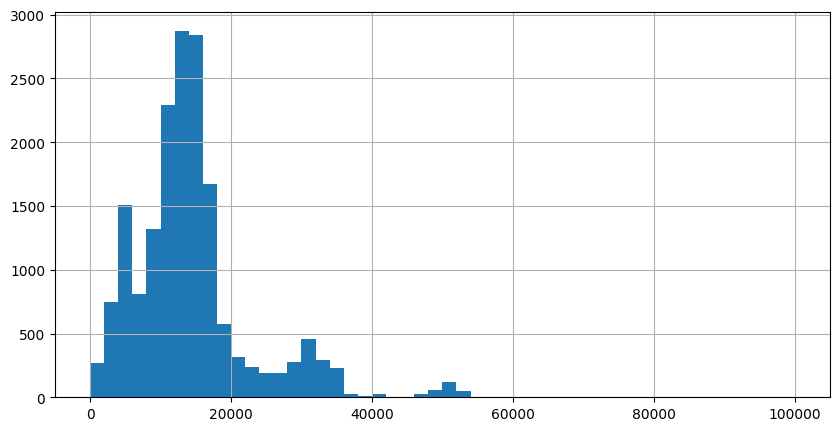

In [257]:
data['city_centers_nearest'].hist(bins = 50, range = (0, 100000), figsize = (10, 5))

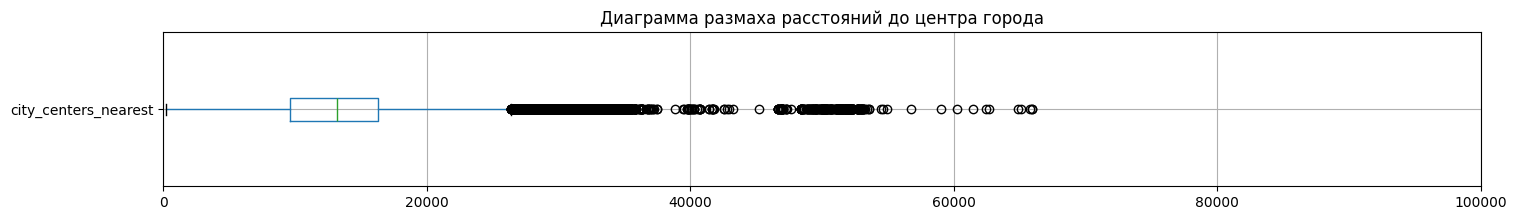

In [258]:
fig, ax = plt.subplots(figsize = (17, 2));
ax = data[['city_centers_nearest']].boxplot(vert = False, ax = ax);
ax.set_xlim(0, 100000);
ax.set_title('Диаграмма размаха расстояний до центра города');

In [259]:
data['city_centers_nearest'].describe()

,city_centers_nearest
count,17445.000000
mean,14347.488277
std,8573.897371
min,181.000000
25%,9585.000000
50%,13188.000000
75%,16300.000000
max,65968.000000


In [260]:
(
    data[['city_centers_nearest']]
        .quantile([.0012, .9988])
        .style.format("{:,.2f}")
)


,city_centers_nearest
0.001200,582.33
0.998800,"53,089.08"


- Рассмотрим подробнее правый край гистограммы

<Axes: >

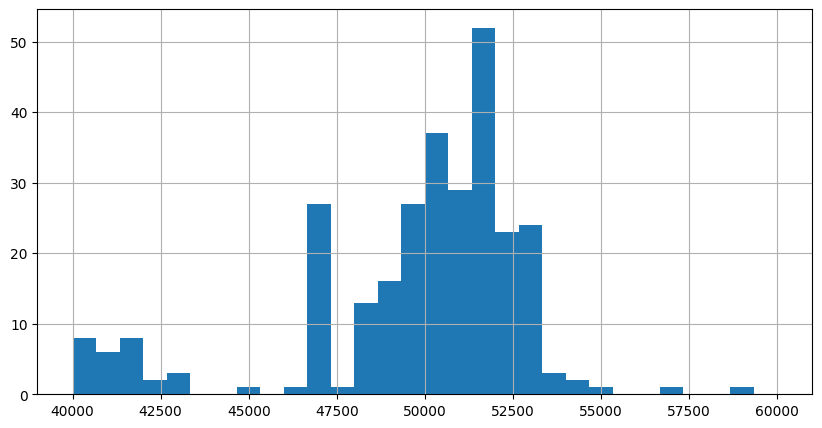

In [261]:
data['city_centers_nearest'].hist(bins = 30, range = (40000, 60000), figsize = (10, 5))

- Отбросим квартиры, расстояние которых до центра более 53 км.
- Квартиры, у которых расстояние до центра 0, веротяно находятся в центре города

In [262]:
shape_before_delete = data['total_images'].count()
data = data.loc[(data['city_centers_nearest'] <= 53000) | (data['city_centers_nearest']).isna()]
(data['total_images'].count() / shape_before_delete).round(4)

np.float64(0.9989)

- Удален 0.1 % данных

*10. Расстояние до аэропорта*

In [263]:
data['airports_nearest'].describe()

,airports_nearest
count,17400.000000
mean,28780.250977
std,12605.498355
min,0.000000
25%,18428.000000
50%,26890.000000
75%,37406.250000
max,71869.000000


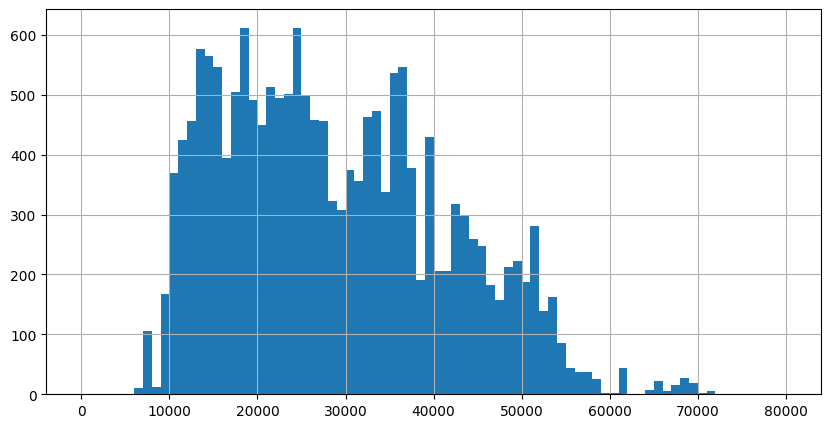

In [264]:
data['airports_nearest'].hist(bins = 80, range = (0, 80000), figsize = (10, 5));

(0.0, 80000.0)

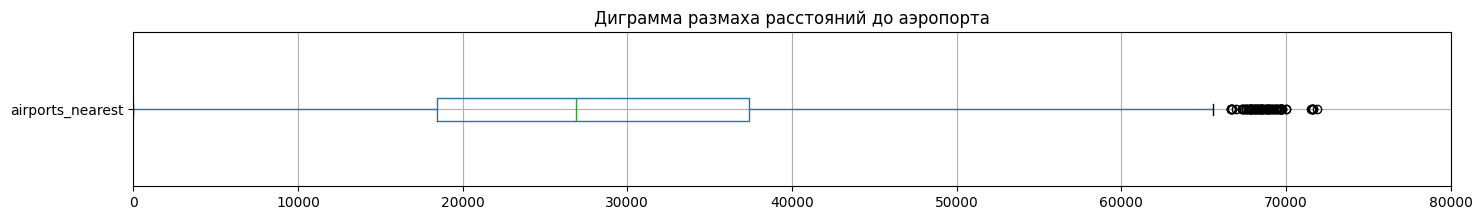

In [265]:
fig, ax = plt.subplots(figsize = (17, 2))
ax = data[['airports_nearest']].boxplot(vert = False, ax = ax)
ax.set_title('Диграмма размаха расстояний до аэропорта')
ax.set_xlim(0, 80000)

In [266]:
(
    data[['airports_nearest']]
        .quantile([.0012, .9988])
        .style.format("{:,.2f}")
)

,airports_nearest
0.001200,"7,026.00"
0.998800,"69,277.30"


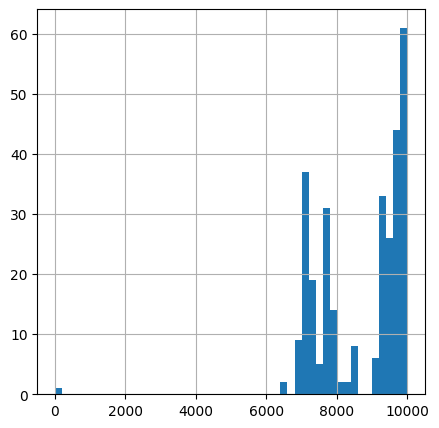

In [267]:
data['airports_nearest'].hist(bins = 50, range = (0, 10000), figsize = (5, 5));

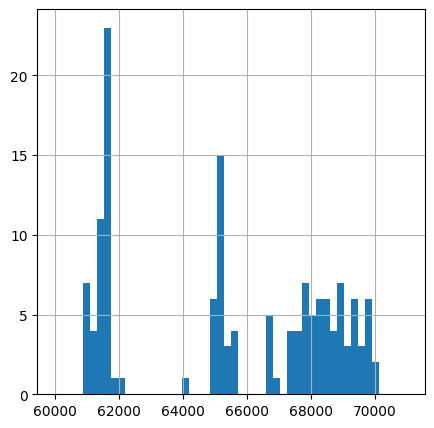

In [268]:
data['airports_nearest'].hist(bins = 50, range = (60000, 71000), figsize = (5, 5));

- Отбросим всё, что левее 7 км и правее 63 км

In [269]:
shape_before_delete = data['total_images'].count()
data = data.loc[((data['airports_nearest'] >= 7000)&(data['airports_nearest'] <= 63000)) | (data['airports_nearest']).isna()]
(data['total_images'].count() / shape_before_delete).round(4)

np.float64(0.9949)

- Было удалено 0.5% данных

*11. Расстояние до ближайшего парка*

In [270]:
data['parks_nearest'].describe()

,parks_nearest
count,7542.000000
mean,496.031557
std,343.870156
min,1.000000
25%,293.000000
50%,457.500000
75%,617.750000
max,3190.000000


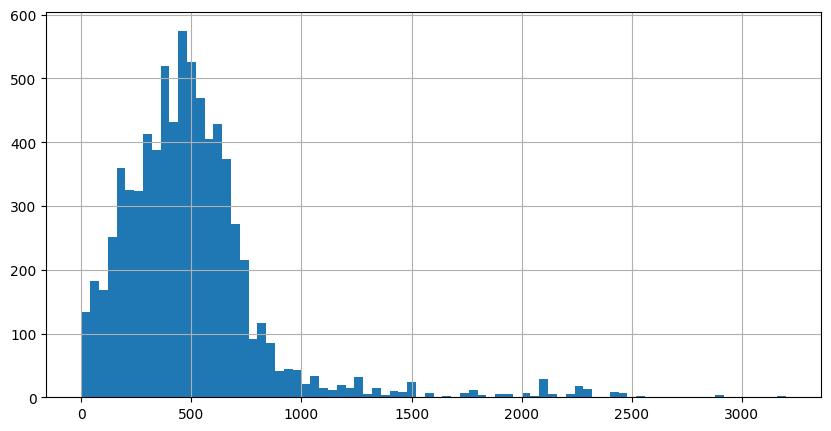

In [271]:
data['parks_nearest'].hist(bins = 80, range = (0, 3200), figsize = (10, 5));

In [272]:
(
    data[['parks_nearest']]
        .quantile([.0012, .9988])
        .style.format("{:,.2f}")
)

,parks_nearest
0.001200,10.00
0.998800,"2,766.97"


In [273]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22591 entries, 0 to 23697
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   total_images                      22591 non-null  int64         
 1   last_price                        22591 non-null  int64         
 2   total_area                        22591 non-null  float64       
 3   first_day_exposition              22591 non-null  object        
 4   rooms                             22591 non-null  int64         
 5   ceiling_height                    20145 non-null  float64       
 6   floors_total                      22591 non-null  int64         
 7   living_area                       20809 non-null  float64       
 8   floor                             22591 non-null  int64         
 9   is_apartment                      22591 non-null  bool          
 10  studio                            22591 non-null  b

- По большому счёту нет смысла удалять из выборки квартиры из - за расстояния до ближайшего парка, оставим датасет без изменений.

*12. День публикации объявления*

<Axes: >

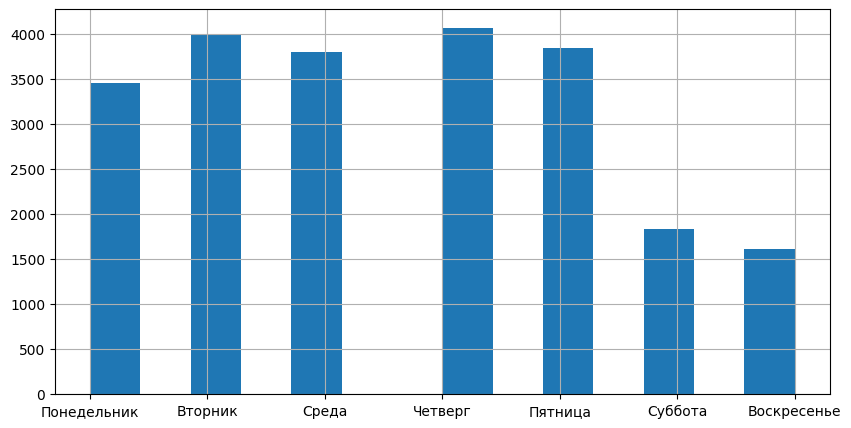

In [274]:
#data['weekday_of_first_day_exposition'].hist( bins = 14, figsize = (20, 5))


#weekdays = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
#data['date_format'] = pd.to_datetime(data['first_day_exposition'].str[:(-9)], format = '%Y-%m-%d')
#data['month_of_exposition'] = pd.DatetimeIndex(data['date_format']).month
#data['year_of_exposition'] = pd.DatetimeIndex(data['date_format']).year
def get_pos_week_day(first_day_exposition):
    return(first_day_exposition.weekday())
data['weekday_pos'] = data['date_format'].apply(get_pos_week_day)

data.sort_values(by = 'weekday_pos', ascending = True)['weekday_of_first_day_exposition'].hist(bins = 14, figsize = (10, 5))



- Из построенной гистограммы видно, что по выходным объявлений по грубой оценке в 2 раза меньше вытставлялось, чем в будние дни.

*13. Месяц публикации объявления*

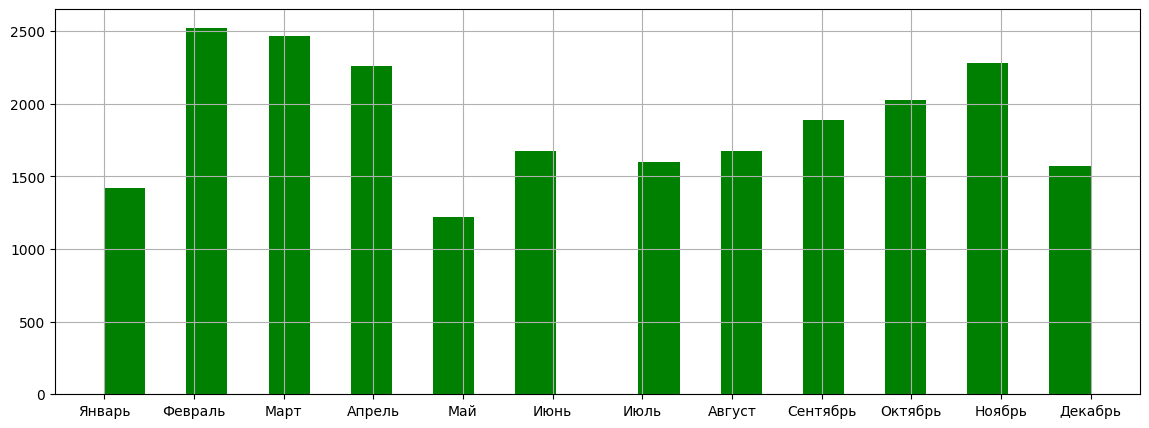

In [275]:
months = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август','Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']



def get_month_name(month_pos):
    return(months[month_pos - 1])
data['month_name'] = data['month_of_exposition'].apply(get_month_name)
data.sort_values(by = 'month_of_exposition', ascending = True)['month_name'].hist(bins = 24, figsize = (14, 5), color = 'green');

- По гистограмме можно заметить, что больше всего объявлений было опубликовано в осенние месяца, а также в феврале, марте и апреле (т.е. конец зимы - середина весны), при этом в мае наблюдается резкий спад.
- Летом количество опубликованных объявлений среднее.
- В декабре и январе количество опубликованных объявлений в тройке наименьших, так как в январе праздники треть месяца. В свою очередь в декабре реже выставляют квартиры на продажу, так как год заканчивается
- После того, как праздники заканчиваются люди, которые не выставили объявления в декабре/январе, публикуют объявления в феврале. К этому количеству людей долбавляются те, кто просто решил в этот месяц начать продавать квартиру.

In [276]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22591 entries, 0 to 23697
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   total_images                      22591 non-null  int64         
 1   last_price                        22591 non-null  int64         
 2   total_area                        22591 non-null  float64       
 3   first_day_exposition              22591 non-null  object        
 4   rooms                             22591 non-null  int64         
 5   ceiling_height                    20145 non-null  float64       
 6   floors_total                      22591 non-null  int64         
 7   living_area                       20809 non-null  float64       
 8   floor                             22591 non-null  int64         
 9   is_apartment                      22591 non-null  bool          
 10  studio                            22591 non-null  b

*14.Стоимость квадратного метра*

In [277]:
data['one_quadrat_metre_area_price'].describe()

,one_quadrat_metre_area_price
count,22591.000000
mean,97397.384578
std,37856.262860
min,10507.000000
25%,76666.000000
50%,94843.000000
75%,113636.000000
max,848484.000000


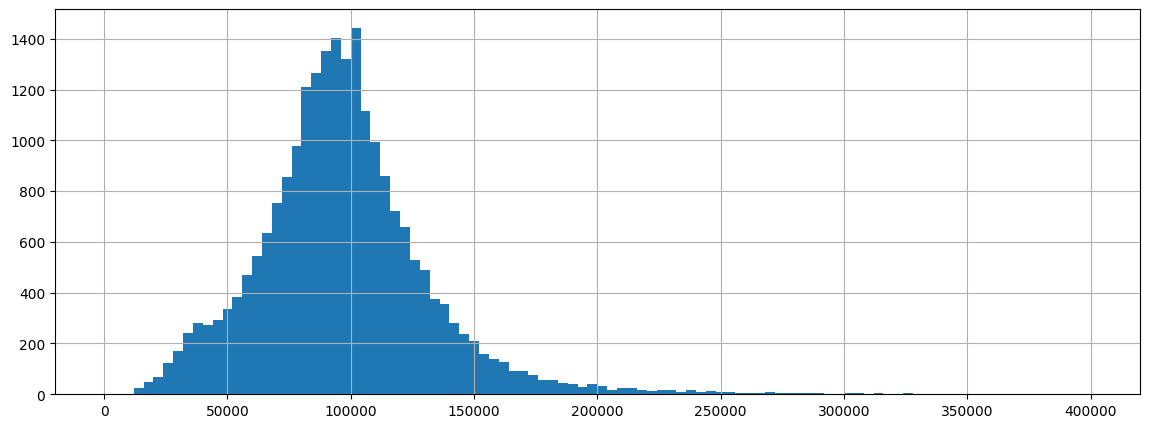

In [278]:
data['one_quadrat_metre_area_price'].hist(bins = 100, range = (0, 400000), figsize = (14, 5));

In [279]:
(
data[['one_quadrat_metre_area_price']]
    .quantile([.0012, .9988])
    .style.format("{:,.2f}")
)

,one_quadrat_metre_area_price
0.001200,"16,041.43"
0.998800,"339,889.74"


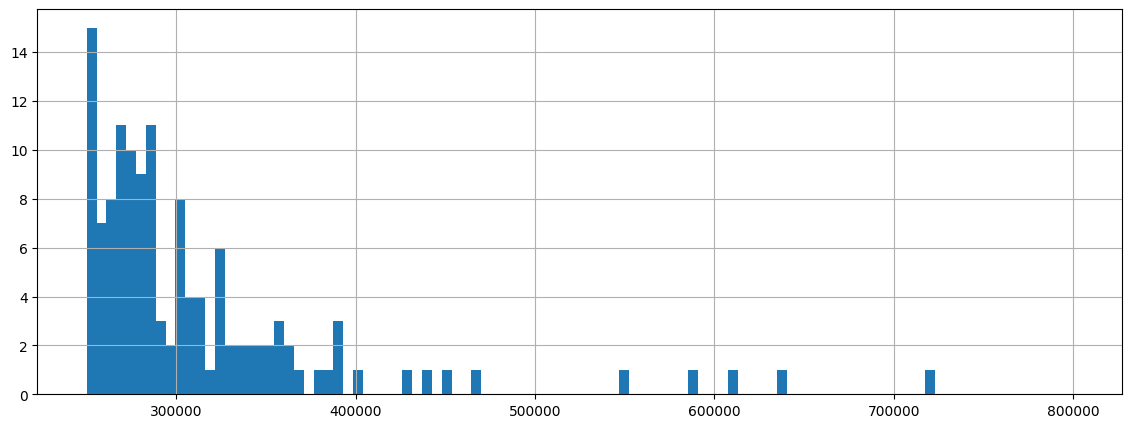

In [280]:
data['one_quadrat_metre_area_price'].hist(bins = 100, range = (250000, 800000), figsize = (14, 5));

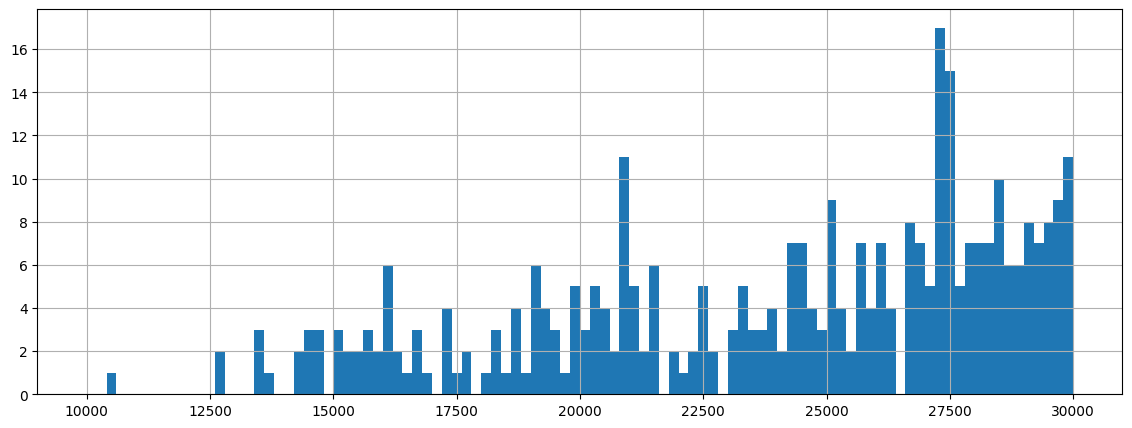

In [281]:
data['one_quadrat_metre_area_price'].hist(bins = 100, range = (10000, 30000), figsize = (14, 5));

In [282]:
shape_before_delete = data['total_images'].count()
data = data.loc[(data['one_quadrat_metre_area_price'] >= 25000)&(data['one_quadrat_metre_area_price'] <= 330000)]
(data['total_images'].count() / shape_before_delete).round(4)

np.float64(0.9911)

- Было удалено 0.9% данных

*15. Количество дней, в течение которых продавалась квартира*

In [283]:
data['days_exposition'].describe()

,days_exposition
count,19452.000000
mean,179.399959
std,218.538018
min,1.000000
25%,44.000000
50%,94.000000
75%,228.250000
max,1580.000000


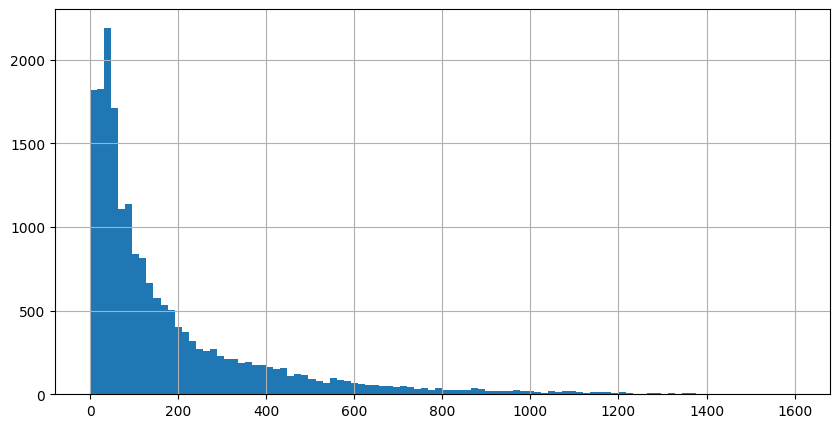

In [284]:
data['days_exposition'].hist(bins = 100, range = (0, 1600), figsize = (10, 5));

In [285]:
(
data[['days_exposition']]
    .quantile([.0012, .9988])
    .style.format("{:,.2f}")
)

,days_exposition
0.001200,3.00
0.998800,"1,366.29"


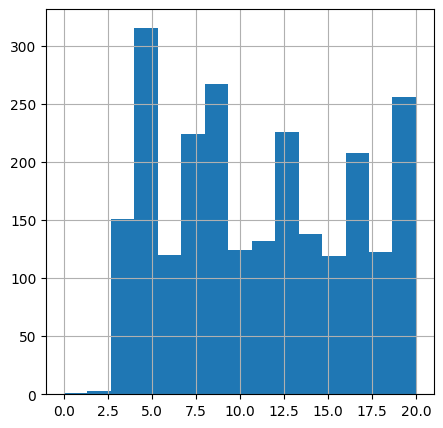

In [286]:
data['days_exposition'].hist(bins = 15, range = (0, 20), figsize = (5, 5));

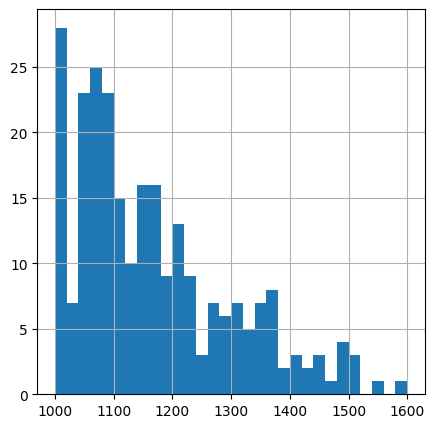

In [287]:
data['days_exposition'].hist(bins = 30, range = (1000, 1600), figsize = (5, 5));

- Оставим объявления, которые висели в течение от 3 до 1300 дней

In [288]:
shape_before_delete = data['total_images'].count()
data = data.loc[((data['days_exposition'] >= 3)&(data['days_exposition'] <= 1300))|(data['days_exposition'].isna())]
(data['total_images'].count() / shape_before_delete).round(4)

np.float64(0.9977)

- Было удалено 0.2 % данных

- Итог по очистке данных:

In [289]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22340 entries, 0 to 23697
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   total_images                      22340 non-null  int64         
 1   last_price                        22340 non-null  int64         
 2   total_area                        22340 non-null  float64       
 3   first_day_exposition              22340 non-null  object        
 4   rooms                             22340 non-null  int64         
 5   ceiling_height                    19995 non-null  float64       
 6   floors_total                      22340 non-null  int64         
 7   living_area                       20597 non-null  float64       
 8   floor                             22340 non-null  int64         
 9   is_apartment                      22340 non-null  bool          
 10  studio                            22340 non-null  b

In [290]:
(data['total_images'].count() / 23599).round(4)

np.float64(0.9467)

- Было удалено около 5,3% данных.

In [291]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.001200,0.00,21.88,2.45,3.00,"962,731.30",13.00,0.00,1.00,2.00
0.010000,1.00,26.00,2.50,4.00,"1,300,000.00",14.00,4.80,1.00,2.00
0.500000,2.00,51.90,2.60,94.00,"4,642,000.00",30.00,9.00,4.00,9.00
0.990000,5.00,154.96,3.50,"1,008.00","24,500,000.00",92.70,30.00,22.00,26.00
0.998800,5.00,214.00,4.00,"1,224.44","36,719,320.00",125.81,42.65,25.19,27.00


**2. Скорость продажи объявлений**

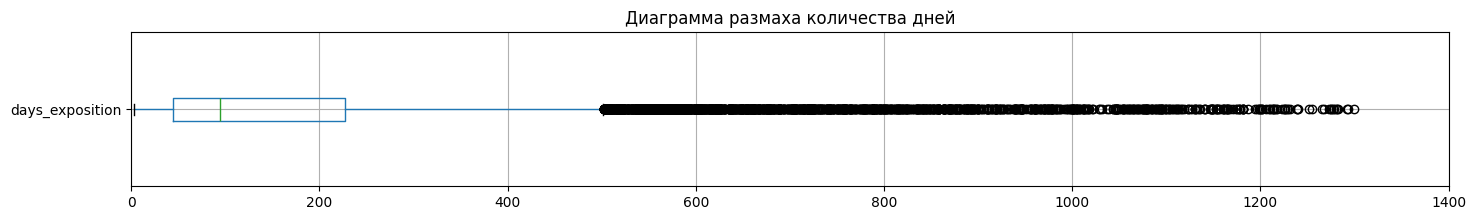

In [292]:
fig, ax = plt.subplots(figsize = (17, 2));
ax = data[['days_exposition']].boxplot(vert = False, ax = ax);
ax.set_title('Диаграмма размаха количества дней');
ax.set_xlim(0, 1400);

In [293]:
data['days_exposition'].describe()

,days_exposition
count,19401.000000
mean,176.492913
std,210.427300
min,3.000000
25%,44.000000
50%,94.000000
75%,227.000000
max,1299.000000


- Исходя из информации на графиках, можно заключить, что обычно продажа квартиры занимает около 94 дней (медиана).
- Всё, что находится внутри "коробки" можно считать средней по продолжительности продажей (от 44 до 225 дней).
- Продажи, которые находятся за пределами коробки сверху (на "усе") - от 225 до 500 дней можно считать долгими продажами.
- Продажи, которые находятся за пределами коробки снизу (на "усе") - от 3 до 44 дней можно считать чрезвычайно быстрыми продажами.
- Продажи, которые находятся за пределами верхнего "уса" - более 500 дней являются чрезвычайно долгими, вероятно на то есть причины в виде высокой цены, неудачного расположения, ремонта и т.п.

In [294]:
data.pivot_table(index = 'year_of_exposition', values = 'days_exposition', aggfunc = ['mean', 'median'])

,mean,median
,days_exposition,days_exposition
year_of_exposition,,
2014,823.043011,764.0
2015,627.104790,568.5
2016,322.219750,235.5
2017,157.755438,102.0
2018,93.794450,63.0
2019,30.623427,23.0


- С каждым годом время продажи квартиры уменьшалось

In [295]:
data.pivot_table(index = 'square_category', values = 'days_exposition', aggfunc = ['mean', 'median'])

,mean,median
,days_exposition,days_exposition
square_category,,
0,154.775582,80.0
1,186.632287,102.0
2,274.505459,179.5
3,289.747059,204.0
4,303.064516,172.0
5,135.500000,135.5


- быстрее всего продавались квартиры с площадью 0 - 100 кв. м.
- дольше продавались квартиры с площадью более 100 кв.м
- странным выглядит тот факт, что квартиры площадью 250 - 300 квадратных метров продавались почти так же быстро, как и 0 - 100 кв. м.

In [296]:
data.pivot_table(index = 'rooms', values = 'days_exposition', aggfunc = ['mean', 'median'])

,mean,median
,days_exposition,days_exposition
rooms,,
0,115.533742,50.0
1,157.202544,80.0
2,169.407100,91.0
3,200.446583,113.0
4,241.632606,150.0
5,287.063107,171.0


- По этой сводной таблице видно, что чем больше комнат, тем дольше продавались квартиры

**3. Факторы, влияющие на общую стоимость объекта.**

*1. Общая площадь*

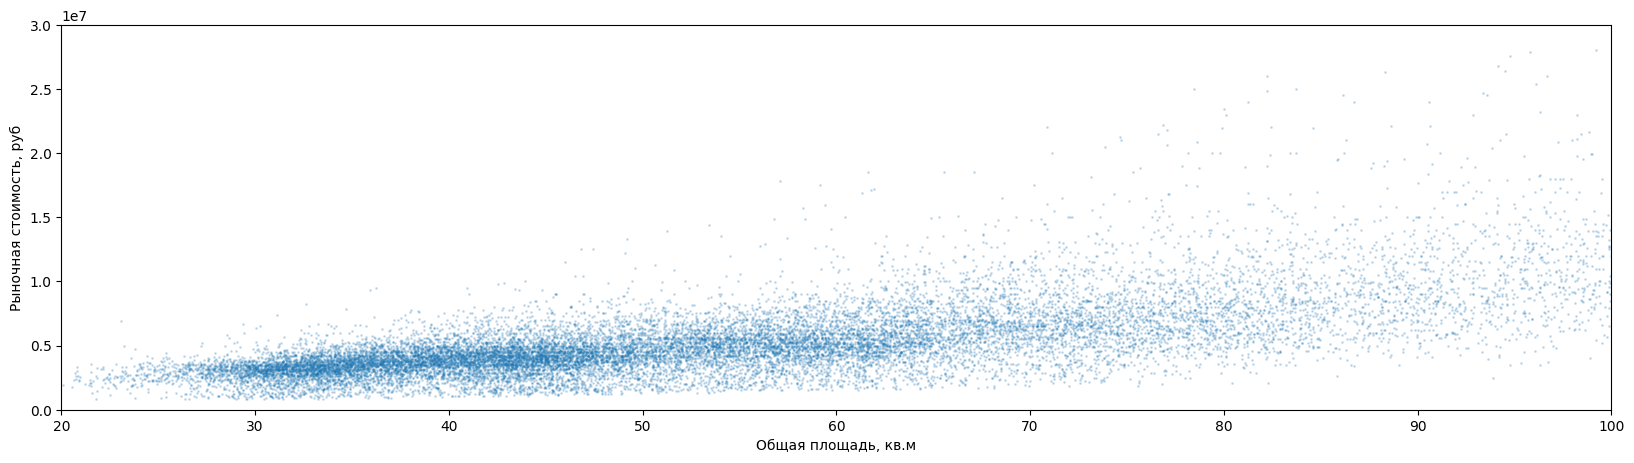

In [297]:
plt.figure(figsize =(20,5));
noise = np.random.normal(0, 2, size = len(data))
total_area = data['total_area'] + noise
last_price = data['last_price'] + noise
plt.plot(total_area, last_price, 'o',
         alpha=0.2, markersize=1);

plt.xlim([20, 100]);
plt.ylim([0, 30000000]);
plt.xlabel('Общая площадь, кв.м');
plt.ylabel('Рыночная стоимость, руб');

In [298]:
data['last_price'].corr(data['total_area']).round(3)

np.float64(0.796)

- Анализируя гистограмму, можно заключить, что общая площадь квартиры влияет на общую стоимость квартиры, и зависимость линейна.
- Подтверждением линейной зависимости между рыночной стоимостью и общей площадью является коэффиент корреляции равный 0.796

*2. Жилая площадь*

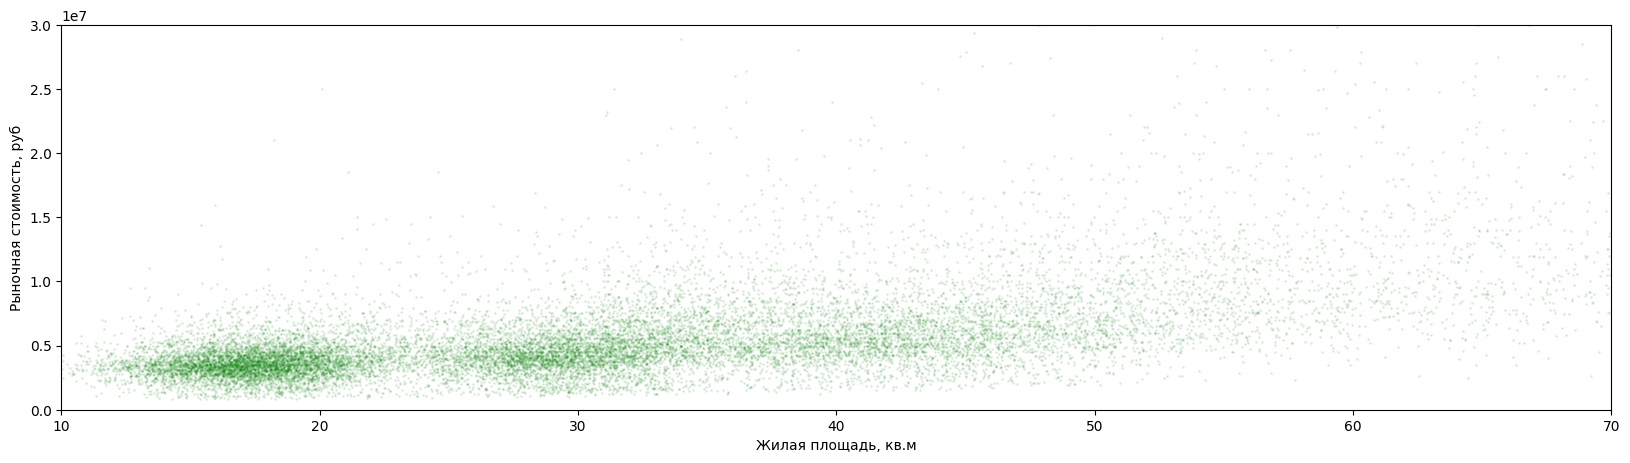

In [299]:
plt.figure(figsize =(20,5));
living_area = data['living_area'] + noise
plt.plot(living_area, last_price, 'o',
         alpha=0.1, markersize=1, color = 'green');

plt.xlim([10, 70]);
plt.ylim([0, 30000000]);
plt.xlabel('Жилая площадь, кв.м');
plt.ylabel('Рыночная стоимость, руб');

In [300]:
data['last_price'].corr(data['living_area']).round(3)

np.float64(0.682)

- В данном случае зависимость также является линеной: при увеличении жилой площади возрастает рыночная стоимость недвижимости
- Для жилой площади линейная зависимость не такая чёткая, как при общей площади, но коэффициент корреляции между рассматриваемыми параметрами также достаточно высок и равен 0.682

*3. Площадь кухни*

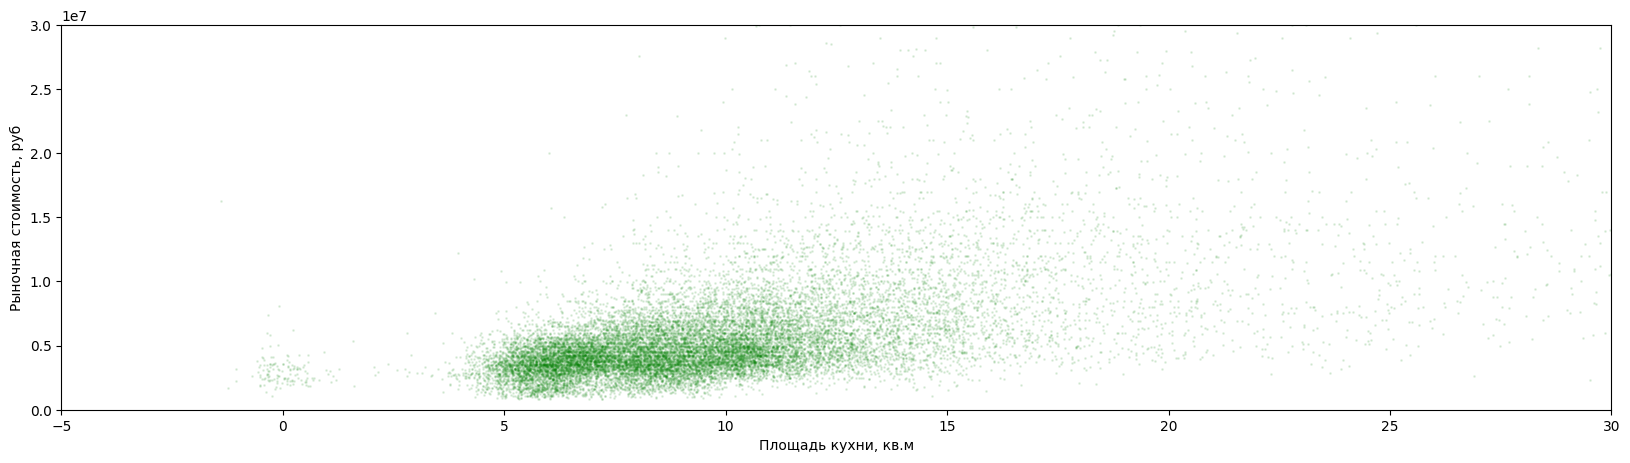

In [301]:
plt.figure(figsize =(20,5));
noise = np.random.normal(0, 0.5, size = len(data))
kitchen_area = data['kitchen_area'] + noise
plt.plot(kitchen_area, last_price, 'o',
         alpha=0.1, markersize=1, color = 'green');

plt.xlim([-5, 30]);
plt.ylim([0, 30000000]);
plt.xlabel('Площадь кухни, кв.м');
plt.ylabel('Рыночная стоимость, руб');

In [302]:
data['last_price'].corr(data['kitchen_area']).round(3)

np.float64(0.601)

- Линейная зависимость между площадью кухни и рыночной стоимостью прослеживается ввиду того, что площадь кухни пропорциональна общей площади. А там эта зависимость чётче.
- Коэффициент корреляции составляет 0.6(зависимость стремится к умеренной)

*4. Количество комнат*

- Ввиду того, что количество комнат является строго целым числом, то обычная диаграмма рассеивания даст мало информации, поэтому воспользуемся диаграммами размаха для этой классификации квартир

In [303]:
df = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['median'])
df

,median
,last_price
rooms,
0,2750000.0
1,3600000.0
2,4800000.0
3,6200000.0
4,8800000.0
5,12600000.0


In [304]:
import seaborn as sns

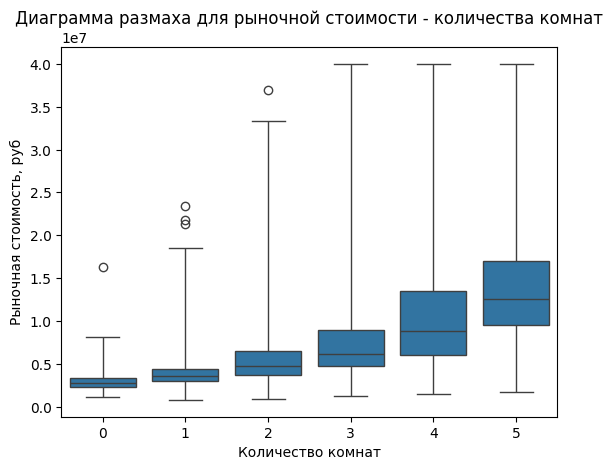

In [305]:
sns.boxplot(x = 'rooms', y = 'last_price', data = data, whis = 10)

plt.xlabel('Количество комнат')
plt.ylabel('Рыночная стоимость, руб')
plt.title('Диаграмма размаха для рыночной стоимости - количества комнат');

In [306]:
df['rooms_copy'] = df.index
df['median', 'last_price'].corr(df['rooms_copy'])

np.float64(0.9606549673986433)

- Построенная диаграмма свидетельствует о том, что при росте числа комнат, увеличивается рыночная стоимость квартиры. Для медианных значений стоимости квартир от разного количества комнат чётко прослеживается линейная зависимость.

*5. Тип этажа*

In [307]:
data.pivot_table(index = 'floor_type', values = 'last_price', aggfunc = ['mean', 'median'])

,mean,median
,last_price,last_price
floor_type,,
другой,6.037778e+06,4800000.0
первый,4.618342e+06,3990000.0
последний,5.622575e+06,4300000.0


(0.0, 10000000.0)

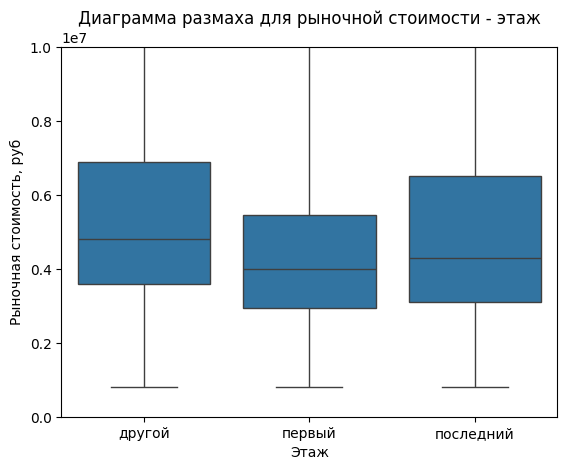

In [308]:
sns.boxplot(x = 'floor_type', y = 'last_price', data = data, whis = 10)

plt.xlabel('Этаж')
plt.ylabel('Рыночная стоимость, руб')
plt.title('Диаграмма размаха для рыночной стоимости - этаж');
plt.ylim(0, 10000000)

- Из сводной таблицы видно, что цена на квартиры на первом этаже меньше всего, на "других" этажах цена выше всего в выборке, а на последнем где - то по середине между предыдущими.
- Эта же информация дублируется на диаграмме размаха

*6. День недели, месяц, год*

In [309]:
df = data.pivot_table(index = 'weekday_pos', values = 'last_price', aggfunc = ['median'])
df.columns = ['median_last_price']
df['index_copy'] = df.index
df

,median_last_price,index_copy
weekday_pos,,
0,4650000.0,0
1,4700000.0,1
2,4700000.0,2
3,4630000.0,3
4,4550000.0,4
5,4600000.0,5
6,4550000.0,6


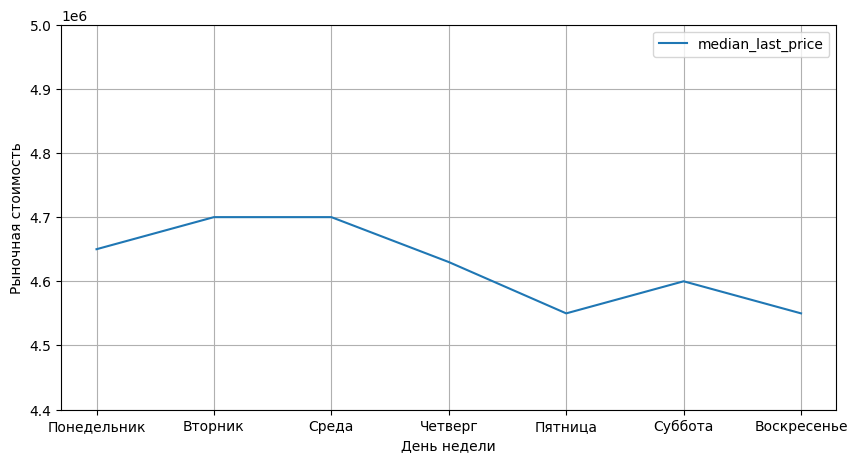

In [310]:
for i in range(0, 7):
    df.loc[df['index_copy'] == i, 'weekday'] = weekdays[i]
df = df.sort_values(by = 'index_copy', ascending = True)
df.head()
df.plot(y = 'median_last_price', x = 'weekday', grid = True, figsize = (10, 5));
plt.ylim(4400000, 5000000);
plt.xlabel('День недели');
plt.ylabel('Рыночная стоимость');

- На диаграмме можно заметить тенденцию к более высокой цене в будние дни и к ёё снижению в выходной дни, а также пятницу
- В выходные медианное значение цены на жильё падает на 100 - 150 тысяч рублей

In [311]:
df = data.pivot_table(index = 'month_of_exposition', values = 'last_price', aggfunc = ['median'])
df.columns = ['median_last_price']
df['index_copy'] = df.index
df

,median_last_price,index_copy
month_of_exposition,,
1,4600000.0,1
2,4650000.0,2
3,4650000.0,3
4,4800000.0,4
5,4500000.0,5
6,4400000.0,6
7,4600000.0,7
8,4600000.0,8
9,4700000.0,9


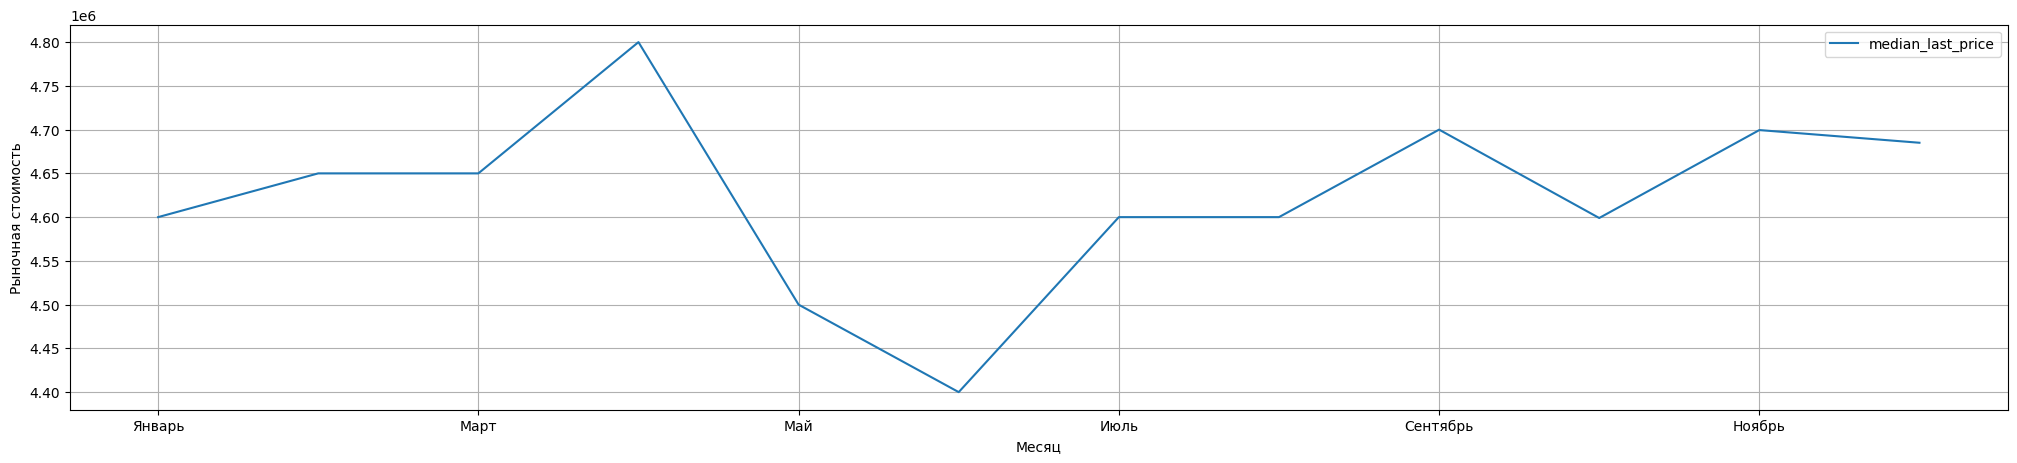

In [312]:
for i in range(1, 13):
    df.loc[df['index_copy'] == i, 'month_name'] = months[i - 1]
df = df.sort_values(by = 'index_copy', ascending = True);
df.plot(y = 'median_last_price', x = 'month_name', grid = True, figsize = (25, 5));
plt.xlabel('Месяц');
plt.ylabel('Рыночная стоимость');

- По графику видно, что медианная рыночная стоимость квартир в мае минимальна и составляет 4.4 миллиона рублей
- В апреле медианная цена максимальна и составляет 4.8 миллиона
- В летний период квартиры медианное значение рыночной стоимости меньше всего, а именно 4.4 - 4.6 миллиона рублей
- Весной медианная цена нестабильна
- Зимой медианное значение рыноночной стоимости колеблется от 4.6 до 4.65 миллиона рублей
- Осенью от 4.6 - 4.7 миллиона рублей

In [313]:
data.info();

<class 'pandas.core.frame.DataFrame'>
Index: 22340 entries, 0 to 23697
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   total_images                      22340 non-null  int64         
 1   last_price                        22340 non-null  int64         
 2   total_area                        22340 non-null  float64       
 3   first_day_exposition              22340 non-null  object        
 4   rooms                             22340 non-null  int64         
 5   ceiling_height                    19995 non-null  float64       
 6   floors_total                      22340 non-null  int64         
 7   living_area                       20597 non-null  float64       
 8   floor                             22340 non-null  int64         
 9   is_apartment                      22340 non-null  bool          
 10  studio                            22340 non-null  b

In [314]:
agg_func_years = {
    'last_price':'median',
#     'city_centers_distance':'median',
    'rooms':'median',
    'total_area':['median','count']
}
df = data.groupby(['year_of_exposition']).agg(agg_func_years)

# df.columns = ['median_last_price', 'city_centers_distance', 'median_rooms', 'median_total_area', 'quantity']

df.columns = ['median_last_price',   'median_rooms', 'median_total_area', 'quantity']
df

,median_last_price,median_rooms,median_total_area,quantity
year_of_exposition,,,,
2014,7182500.0,3.0,75.0,110
2015,5198000.0,2.0,59.0,1064
2016,4500000.0,2.0,53.0,2621
2017,4500000.0,2.0,51.2,7778
2018,4600000.0,2.0,50.5,8052
2019,5050000.0,2.0,51.7,2715


In [315]:
df['year_duplicated'] = df.index

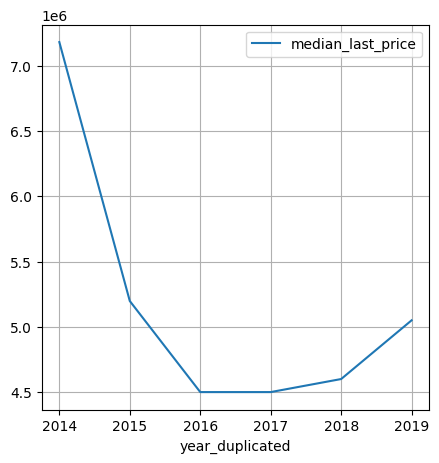

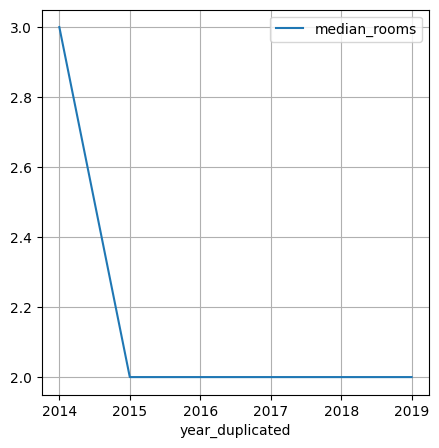

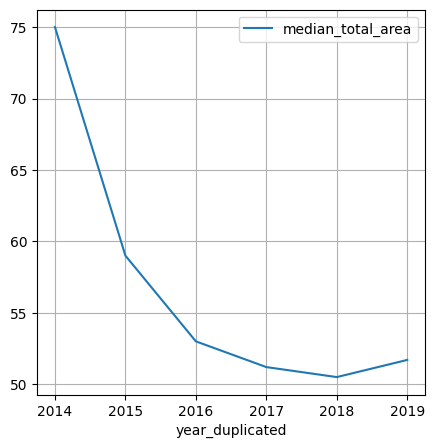

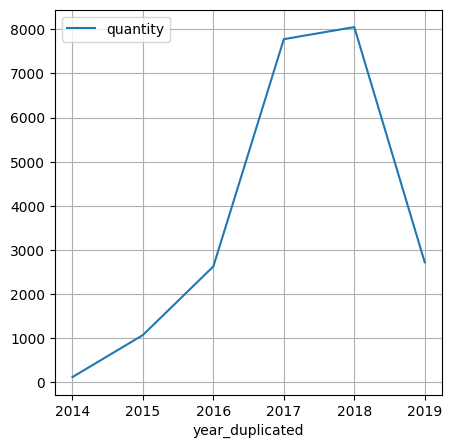

In [316]:
for i in df.columns:
    try:
        df.plot(x = 'year_duplicated', y = i, figsize = (5, 5), grid = True)
    except:
        continue

- Чем меньше объявлений, тем выше рыночная стоимость квартиры. Это подтверждают объявления за 2018 - 2019 год, когда общая площадь и другие медианные параметры одинаковы, но при этом количество объявлений в 2019 году меньше в 3 раза, чем в предыдущем году, а цена при этом больше на 500 тысяч рублей.
- Чем больше площадь квартиры, тем выше рыночная стоимость. В 2014 году медианная общая площадь наибольшая среди рассматриваемого периода(79 кв.м.), соответственно медианная цена также самая высокая (7 млн рублей при том, что в остальные года медианная цена составляла примерно 5 млн рублей при медианной площади около 50 - 55 кв.м.)
- Количество комнат по большому счёту подтверждает предыдущий пункт. Потому как только в 2014 году медианным количеством комнат является 3, в то время как для остальных 2.


**4. Средняя цена объявления**

In [317]:
data_last_price_frequency = data.pivot_table(index = 'locality_name', values = 'one_quadrat_metre_area_price', aggfunc = ['count', 'mean'])
data_last_price_frequency.columns = ['one_quadrat_metre_area_price_count', 'one_quadrat_metre_area_price _mean']
data_last_price_frequency = data_last_price_frequency.sort_values(by = 'one_quadrat_metre_area_price_count', ascending = False).head(10)
data_last_price_frequency['one_quadrat_metre_area_price_mean'] = data_last_price_frequency['one_quadrat_metre_area_price _mean'].round(0)
df = data_last_price_frequency.sort_values(by = 'one_quadrat_metre_area_price _mean', ascending = False).head(10)
df['locality_name_dupl'] = df.index

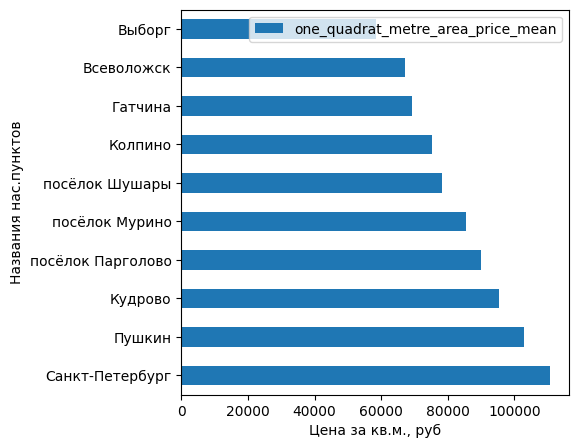

In [318]:
df.plot(y = 'one_quadrat_metre_area_price_mean', x = 'locality_name_dupl', kind = 'barh', figsize = (5,5));
plt.xlabel('Цена за кв.м., руб');
plt.ylabel('Названия нас.пунктов');

- Наиболее высокая средняя цена за квадратный метр наблюдается в Санкт-Петербурге, Пушкине, деревне Кудрово и посёлке Парголово.
- Наиболее низкая средняя цена за квадратный метр (среди указанной выборки) наблюдается в Гатчине, Всеволожске, Выборге.

**5. Стоимость квартир в зависимости от расстояния**

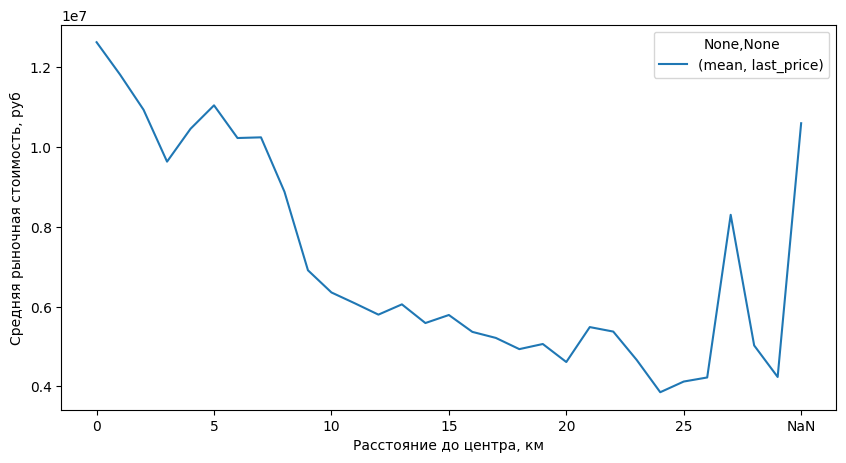

In [319]:
df = data.loc[(data['locality_name']=='Санкт-Петербург')]
df = df.dropna(subset = ['city_centers_distance', 'last_price', 'floor_type'], axis = 0)
df.pivot_table(index = ['city_centers_distance'], values = 'last_price', aggfunc = ['mean']).plot(figsize = (10, 5));
plt.xlabel('Расстояние до центра, км');
plt.ylabel('Средняя рыночная стоимость, руб');

- На графике видно, что неоднозначную зависимость. На 3 км от центра - провал по цене, при этом на 5 км наблюдается рост
- Также необычным выглядит выброс на 27 километре от Санкт - Петербурга

- По графику видно, что чем ближе квартира к центру Санкт - Петербурга, тем выше цена жилья.

In [320]:
df_dist = df.groupby(['city_centers_distance', 'floor_type'])['total_images'].agg('count')
for i in [3, 5, 27]:
    print(df_dist[i])
    print('-----------------------------------')


floor_type
другой       194
первый        51
последний     73
Name: total_images, dtype: int64
-----------------------------------
floor_type
другой       623
первый        74
последний    124
Name: total_images, dtype: int64
-----------------------------------
floor_type
другой       1
последний    1
Name: total_images, dtype: int64
-----------------------------------


In [321]:
df.loc[df['city_centers_distance'] == 27]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,category_distance_to_city_center,one_quadrat_metre_area_price,date_format,month_of_exposition,year_of_exposition,weekday_of_first_day_exposition,floor_type,city_centers_distance,weekday_pos,month_name
748,13,14350000,74.0,2017-11-28T00:00:00,2,3.13,5,30.0,3,False,...,5.0,193918,2017-11-28,11,2017,Вторник,другой,27,1,Ноябрь
5961,6,2250000,32.0,2018-02-27T00:00:00,1,2.60,2,16.5,2,False,...,5.0,70312,2018-02-27,2,2018,Вторник,последний,27,1,Февраль


In [322]:
aggfunc = {
    'one_quadrat_metre_area_price' : ['mean', 'median'],
    'rooms' : ['mean', 'median'],
    'last_price' : ['mean', 'median'],
    'total_area' : ['mean', 'median', 'count']

}
df_info_3_5_km = df.loc[(df['city_centers_distance'] == 3)|(df['city_centers_distance'] == 5)]
df_info_3_5_km.groupby(['city_centers_distance','floor_type']).agg(aggfunc).round(2)

one_quadrat_metre_area_price           rooms  \
                                                         mean    median  mean   
city_centers_distance floor_type                                                
3                     другой                        121813.39  111620.5  2.85   
                      первый                        109415.25  102040.0  2.25   
                      последний                     114325.55  105468.0  2.88   
5                     другой                        135991.39  128410.0  2.61   
                      первый                        110802.15  100000.0  2.53   
                      последний                     132379.21  129053.0  2.72   

                                          last_price            total_area  \
                                 median         mean     median       mean   
city_centers_distance floor_type                                             
3                     другой        3.0  10206233.50  8419000.0      84.73   
                      первый        2.0   7229801.96  5800000.0      65.93   
                      последний     3.0   9787865.10  8600000.0      86.49   
5                     другой        3.0  11338610.88  9250000.0      84.03   
                      первый        2.0   7282837.15  6545000.0      67.51   
                      последний     3.0  11806314.94  9450000.0      88.80   

                                               
                                 median count  
city_centers_distance floor_type               
3                     другой       79.5   194  
                      первый       60.2    51  
                      последний    83.0    73  
5                     другой       78.0   623  
                      первый       64.7    74  
                      последний    80.0   124

- Причина выброса на 27 - километре заключается в том, что там продаётся всего 2 объекта недвижимости, один из которых очень дорого стоит, а именно 14.3 миллиона рублей
- Причина спада цены на 3 км, а также резкого роста на 5 км заключается в разном соотношении квартир на другом и первом/последнем этажах, в первом случае это приблизительно 1.6, в то время как во втором это 3.1. А как было выяснено ранее: на других этажах квартиры ценятся больше при прочих равных факторах, чем на первом/последнем
- Различие в средней площади на 3 - м и 5 - м километре и в других параметрах незначиительно, но стоимость за квадратный метр всё равно выше на 5 - м километре
- Это может быть обусловлено тем, что на 5 - м километре жильё находится в более престижном районе

### Общий вывод

Целью исследования данного проекта было определить, от каких факторов зависит рыночная стоимость объектов в Санкт - Петербургe. Таким образом, укажем эти факторы:
- от увеличения общей площади жилья цена на квартиру увеличивается
- от увеличения жилой площади(она зависит от общей площади квартиры, таким образом, этот фактор является следствием предыдущего) цена на квартиру увеличивается
- чем расстояние до центра города меньше, тем выше цена жилья. При этом стоит обратить внимание на тот фактор, что есть престижные районы(пример: 5 - й километр от центра Санкт - Петербурга) и не такие престижные(пример: 3 - й километр), которые эту зависимость нарушают. Но в целом эта тенденция сохраняется
- этаж квартиры влияет на его рыночную стоимость: на первом этаже квартиры дешевле всего, на последнем этаже, как правило, чуть выше, наибольшая цена характерна для квартир, находящихся не на крайних этажах.
- на цену оказывает влияние год публикации(2014 год - наибольшая цена на рассматриваемом периоде, 2014 - 2016 спад, 2016 - 2017 средняя цена не менялась, 2017 - 2019 - рост, но в 2019 году средняя цена ниже, чем в 2014 году). Но эта зависимость обусловлена:
 1. Количеством опубликованных объявлений: чем их меньше - чем выше цена;
 2. Медианной площадью опубликованных квартир: в 2014 году медианная площадь составляла 72 кв.м, в то время как в остальные периоды - 50 - 55 кв.м.
 3. Проичими факторами, которые связаны не только с квартирой.
- наиболее высокая средняя цена за квадратный метр наблюдается в Санкт-Петербурге, Пушкине, деревне Кудрово и посёлке Парголово.
- наиболее низкая средняя цена за квадратный метр (среди топ - 10 населённых пунктов с самой высокой средней стоимостью за квадратный метр) наблюдается в Гатчине, Всеволожске, Выборге.
- увеличение количества комнат способствует увеличению медианного значения стоимости жилья
Общие замечаения в процессе исследования:
- опубликованных объявлений по выходным в среднем в 2 раза меньше, чем по будним дням.
- наибольшая активность по продажам квартир приходится на осень, а также на период конца зимы - серердины весны, в декабре - январе продаж выставленных объявлений меньше всего.
- в среднем для наибольшего числа квартир ближайший парк от дома находится в 300 - 600 метрах.
- аэропорт от для наибольшой части датасета находится в 10 - 40 километрах.
- наибольшое количество квартир приходится на 7 - 8 - этажные дома(около 5000)
- стоит отметить тот факт, что с 2014 по 2019 каждый год сокращалось время продажи квартир. Было выяснено также, что чем больше комнат в квартире, тем дольше продавалась квартира
- на этапе предобработки было удалено 5.3% данных